In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [3]:
plant = "S"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  S ['INSTRUÇÕES', 'Clínquer', '97', '62']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('S', '97', array(['CPIIF40'], dtype=object)),
 ('S', '62', array(['CPIIZ32'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIIF40': 1, 'CPIIZ32': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 1513 non-null   object        
 1   (Data, Produção)                             1513 non-null   datetime64[ns]
 2   (Horário, Produção)                          1513 non-null   object        
 3   (Data, Medida)                               1513 non-null   datetime64[ns]
 4   (Horário, Medida)                            1513 non-null   object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        1513 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  1513 non-null   int64         
 7   (Obs., Unnamed: 8_level_2)                   1513 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 94.7+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 82.9 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                1513 non-null   object 
 1   MgO                1513 non-null   object 
 2   Na2O               1513 non-null   object 
 3   Al2O3              1513 non-null   object 
 4   SiO2               1513 non-null   object 
 5   SO3                1513 non-null   object 
 6   K2O                1513 non-null   object 
 7   TiO2               0 non-null      float64
 8   Fe2O3              1513 non-null   object 
 9   Perda ao fogo      1513 non-null   object 
 10  Resíduo insolúvel  1513 non-null   object 
 11  Obs.               0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 142.0+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                1513 non-null   object 
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          1513 non-null   object 
 10  Portlandita        1513 non-null   object 
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 non

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            1513 non-null   object 
 1   (Unnamed: 137_level_1, #200)              1513 non-null   object 
 2   (Unnamed: 138_level_1, #325)              1513 non-null   object 
 3   (Unnamed: 139_level_1, #400)              1513 non-null   object 
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 71.0+ KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1513 non-null   object 
 1   (Tempo de pega, Fim)              1513 non-null   object 
 2   (Resistência à compressão, 1 d)   0 non-null      float64
 3   (Resistência à compressão, 3 d)   1513 non-null   object 
 4   (Resistência à compressão, 7 d)   1513 non-null   object 
 5   (Resistência à compressão, 28 d)  1513 non-null   object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 82.9+ KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Composição"].rename(
            {"Sulfato de cálcio": "Sulfato de cálcio (composição)"}, axis=1
        ),
        df["Cimento"]["Análise mineralógica"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  1513 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  1513 non-null   object 
 2   (Data, Produção)                                              1513 non-null   object 
 3   (Horário, Produção)                                           1513 non-null   object 
 4   (Data, Medida)                                                1513 non-null   object 
 5   (Horário, Medida)                                             1513 non-null   object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         1513 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   1513 no

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
    "Sulfato de cálcio": "Calcium sulfate",
    "C3S total": "Total C3S",
    "C2S total": "Total C2S",
    "C2S alpha": "Alpha C2S",
    "C2S beta": "Beta C2S",
    "C2S gama": "Gamma C2S",
    "C4AF": "C4AF",
    "C3A": "C3A",
    "C3A cubic": "Cubic C3A",
    "C3A orto": "Orthorhombic C3A",
    "CaO livre": "Free CaO",
    "Portlandita": "Portlandite",
    "Periclasio": "Periclase",
    "Arcanita": "Arcanite",
    "Aphthalita": "Aphthitalite",
    "Langbeinita": "Langbeinite",
    "Bassanita": "Bassanite",
    "Anidrita": "Anhydrite",
    "Calcita": "Calcite",
    "Dolomita": "Dolomite",
    "Quartzo": "Quartz",
    "Muscovita": "Muscovite",
    "Sulfato de cálcio (composição)": "Calcium sulfate (composition)",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "Calcium sulfate (composition)",
    "Calcium sulfate",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimita",
    "Quartz",
    "Muscovite",
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string 

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(1512, 54)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant    City       Date  Clínquer  Fíler calcário  Cinza volante  Escória  \
0     S  Cuiabá 2021-01-04       NaN             NaN            NaN      NaN   
1     S  Cuiabá 2021-01-05       NaN             NaN            NaN      NaN   
2     S  Cuiabá 2021-01-06       NaN             NaN            NaN      NaN   
3     S  Cuiabá 2021-01-07       NaN             NaN            NaN      NaN   
4     S  Cuiabá 2021-01-08       NaN             NaN            NaN      NaN   

   Argila calcinada  Calcium sulfate (composition)  Total C3S  ...  #325  \
0               NaN                            NaN        NaN  ...   NaN   
1               NaN                            NaN        NaN  ...   NaN   
2               NaN                            NaN        NaN  ...   NaN   
3               NaN                            NaN        NaN  ...   NaN   
4               NaN                            NaN        NaN  ...   NaN   

   #400  Specific Gravity  Initial setting time  Final setting time  CS1  \
0  2.65               NaN                 120.0               160.0  NaN   
1  1.59               NaN                 120.0               155.0  NaN   
2  1.27               NaN                 135.0               170.0  NaN   
3  1.59               NaN                 120.0               160.0  NaN   
4  2.05               NaN                 140.0               180.0  NaN   

         CS3        CS7       CS28        Cement_Type  
0  33.500000  37.299999  46.099998  CP II-F40Expedido  
1  34.599998  38.400002  45.799999  CP II-F40Expedido  
2  34.799999  39.500000  45.599998  CP II-F40Expedido  
3  34.799999  40.500000  45.599998  CP II-F40Expedido  
4  34.299999  38.900002  45.500000  CP II-F40Expedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant    City       Date  Clínquer  Fíler calcário  Cinza volante  \
1507     S  Cuiabá 2023-07-13       NaN             NaN            NaN   
1508     S  Cuiabá 2023-07-14       NaN             NaN            NaN   
1509     S  Cuiabá 2023-07-15       NaN             NaN            NaN   
1510     S  Cuiabá 2023-07-18       NaN             NaN            NaN   
1511     S  Cuiabá 2023-07-19       NaN             NaN            NaN   

      Escória  Argila calcinada  Calcium sulfate (composition)  Total C3S  \
1507      NaN               NaN                            NaN        NaN   
1508      NaN               NaN                            NaN        NaN   
1509      NaN               NaN                            NaN        NaN   
1510      NaN               NaN                            NaN        NaN   
1511      NaN               NaN                            NaN        NaN   

      ...  #325   #400  Specific Gravity  Initial setting time  \
1507  ...   NaN   9.80               NaN                 194.0   
1508  ...   NaN  10.01               NaN                 183.0   
1509  ...   NaN  10.32               NaN                 190.0   
1510  ...   NaN   9.95               NaN                 170.0   
1511  ...   NaN  10.16               NaN                 170.0   

      Final setting time  CS1        CS3        CS7       CS28  \
1507               222.0  NaN  23.900000  29.000000  35.099998   
1508               225.0  NaN  23.000000  28.000000  34.200001   
1509               222.0  NaN  23.200001  28.200001  34.500000   
1510               204.0  NaN  23.799999  28.700001  34.400002   
1511               213.0  NaN  22.299999  27.799999  34.099998   

            Cement_Type  
1507  CP II-Z32Expedido  
1508  CP II-Z32Expedido  
1509  CP II-Z32Expedido  
1510  CP II-Z32Expedido  
1511  CP II-Z32Expedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Plant                          1512 non-null   object        
 1   City                           1512 non-null   object        
 2   Date                           1512 non-null   datetime64[ns]
 3   Clínquer                       0 non-null      float64       
 4   Fíler calcário                 0 non-null      float64       
 5   Cinza volante                  0 non-null      float64       
 6   Escória                        0 non-null      float64       
 7   Argila calcinada               0 non-null      float64       
 8   Calcium sulfate (composition)  0 non-null      float64       
 9   Total C3S                      0 non-null      float64       
 10  Total C2S                      0 non-null      float64       
 11  Alpha C2S        

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           50
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                             1512  2022-04-02 18:08:34.285713920   
Clínquer                          0.0                            NaN   
Fíler calcário                    0.0                            NaN   
Cinza volante                     0.0                            NaN   
Escória                           0.0                            NaN   
Argila calcinada                  0.0                            NaN   
Calcium sulfate (composition)     0.0                            NaN   
Total C3S                         0.0                            NaN   
Total C2S                         0.0                            NaN   
Alpha C2S                         0.0                            NaN   
Beta C2S                          0.0                            NaN   
Gamma C2S                         0.0                            NaN   
C4AF                              0.0                            NaN   
C3A                             358.0                       4.591201   
Cubic C3A                         0.0                            NaN   
Orthorhombic C3A                  0.0                            NaN   
Free CaO                       1508.0                       1.484118   
Portlandite                     346.0                       1.005954   
Periclase                         0.0                            NaN   
Arcanite                          0.0                            NaN   
Aphthitalite                      0.0                            NaN   
Langbeinite                       0.0                            NaN   
Calcium sulfate                   0.0                            NaN   
Bassanite                         0.0                            NaN   
Anhydrite                         0.0                            NaN   
Calcite                           0.0                            NaN   
Dolimita                          0.0                            NaN   
Quartz                            0.0                            NaN   
Muscovite                         0.0                            NaN   
CaO                            1506.0                       56.56913   
MgO                            1506.0                       4.973651   
Na2O                           1506.0                       0.202249   
Al2O3                          1503.0                        4.82233   
SiO2                           1506.0                      20.670983   
SO3                            1506.0                       2.746135   
K2O                            1506.0                       0.715907   
TiO2                              0.0                            NaN   
Fe2O3                          1506.0                       3.021287   
Loss on Ignition               1509.0                       6.958622   
Insoluble Residue              1507.0                       7.527425   
Blaine                         1500.0                       4789.636   
#200                           1506.0                       0.009024   
#325                             95.0                            0.0   
#400                           1499.0                       5.992455   
Specific Gravity                  0.0                            NaN   
Initial setting time           1493.0                     162.158071   
Final setting time             1492.0                     204.968499   
CS1                               0.0                            NaN   
CS3                            1509.0                      28.222465   
CS7                            1509.0                        33.1556   
CS28                           1495.0                      40.124488   

                                               min                  25%  \
Date                           2021-01-02 00:00:00  2021-08-16 00:00:00   
Clínquer                                       NaN                  NaN   
Fíler calcário                                 NaN            

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique                top  freq  \
Plant        1512      1                  S  1512   
City         1512      1             Cuiabá  1512   
Date         1512    NaN                NaN   NaN   
Cement_Type  1512      2  CP II-F40Expedido   766   

                                      mean                  min  \
Plant                                  NaN                  NaN   
City                                   NaN                  NaN   
Date         2022-04-02 18:08:34.285713920  2021-01-02 00:00:00   
Cement_Type                            NaN                  NaN   

                             25%                  50%                  75%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-08-16 00:00:00  2022-03-31 12:00:00  2022-11-11 06:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             max  
Plant                        NaN  
City                         NaN  
Date         2023-08-10 00:00:00  
Cement_Type                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['S'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CP II-F40Expedido', 'CP II-Z32Expedido'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Cuiabá'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
S    1512
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CP II-F40Expedido    766
CP II-Z32Expedido    746
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Cuiabá    1512
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_175222/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


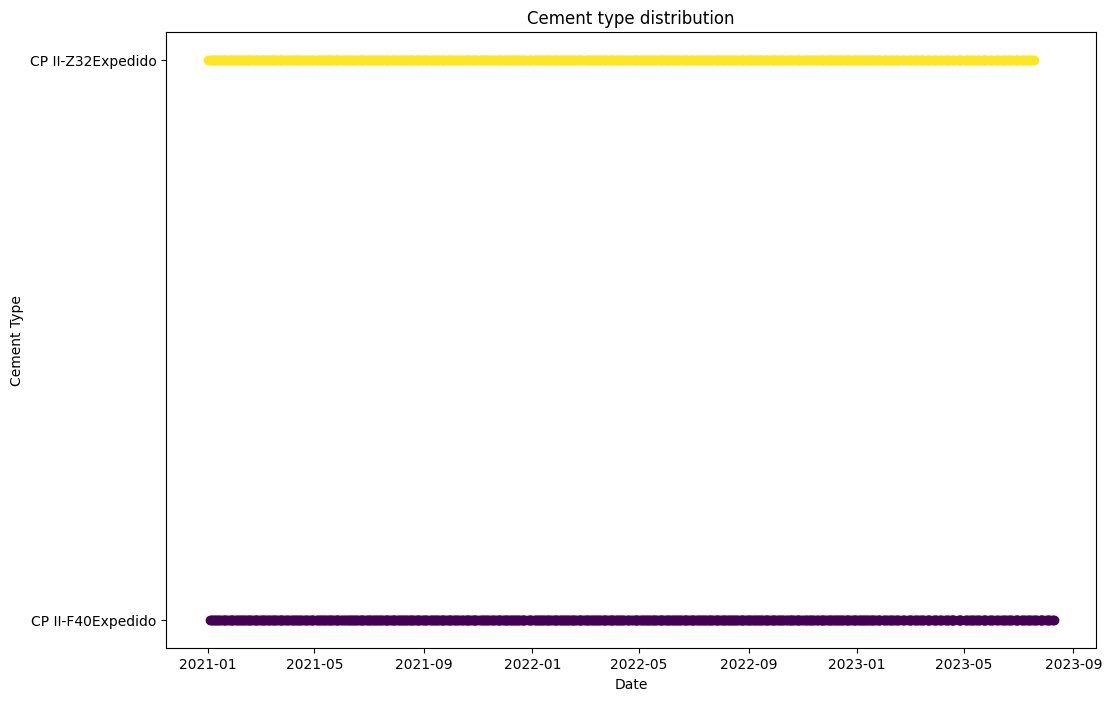

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP II-F40Expedido
CP II-Z32Expedido


<IPython.core.display.Javascript object>

In [39]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC")].groupby(
    "Cement_Type"
)["CS28"].describe()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [40]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC") |
(df["Cement_Type"] == "CP I40Expedido")
  ].groupby("Cement_Type")["CS28"].describe()


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [41]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [42]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP II-F-40    766
CP II-Z-32    746
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_175222/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


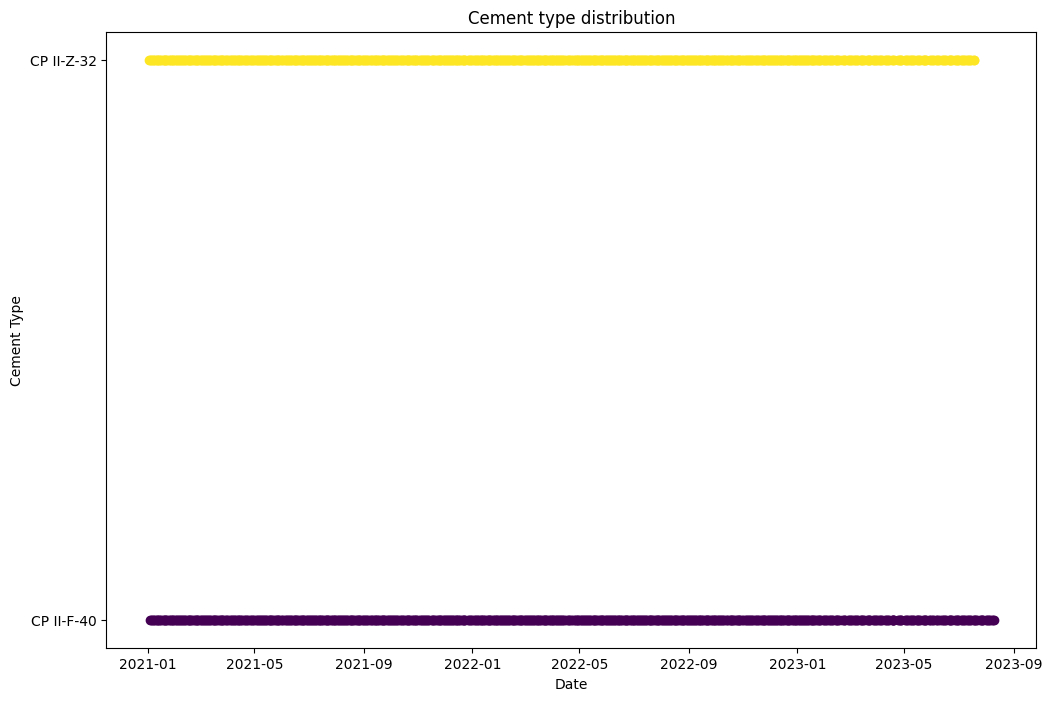

<IPython.core.display.Javascript object>

In [43]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [44]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

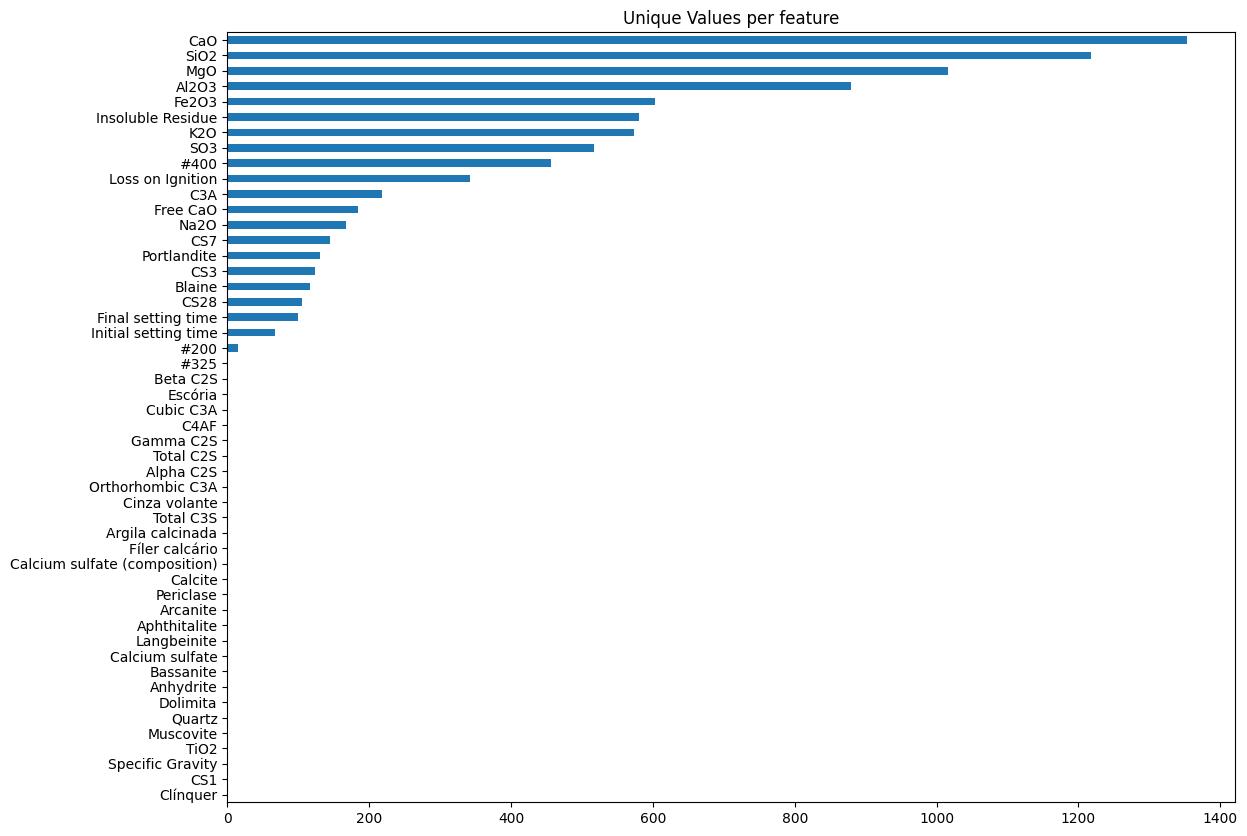

<IPython.core.display.Javascript object>

In [45]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

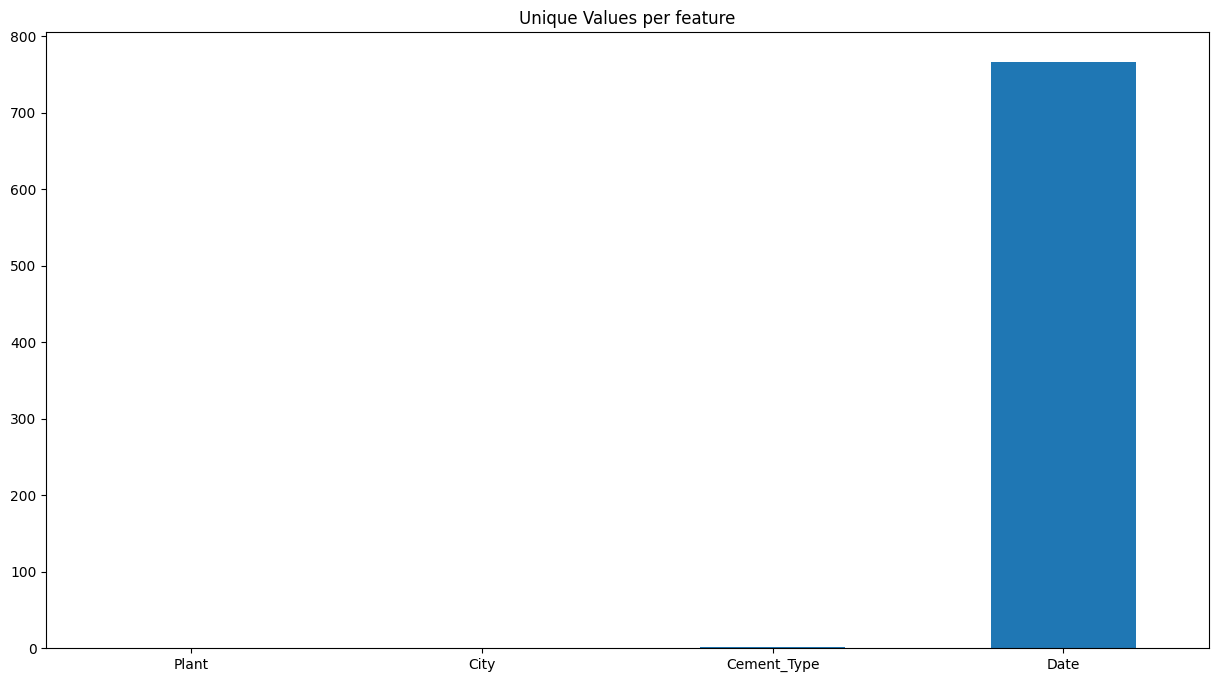

<IPython.core.display.Javascript object>

In [46]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

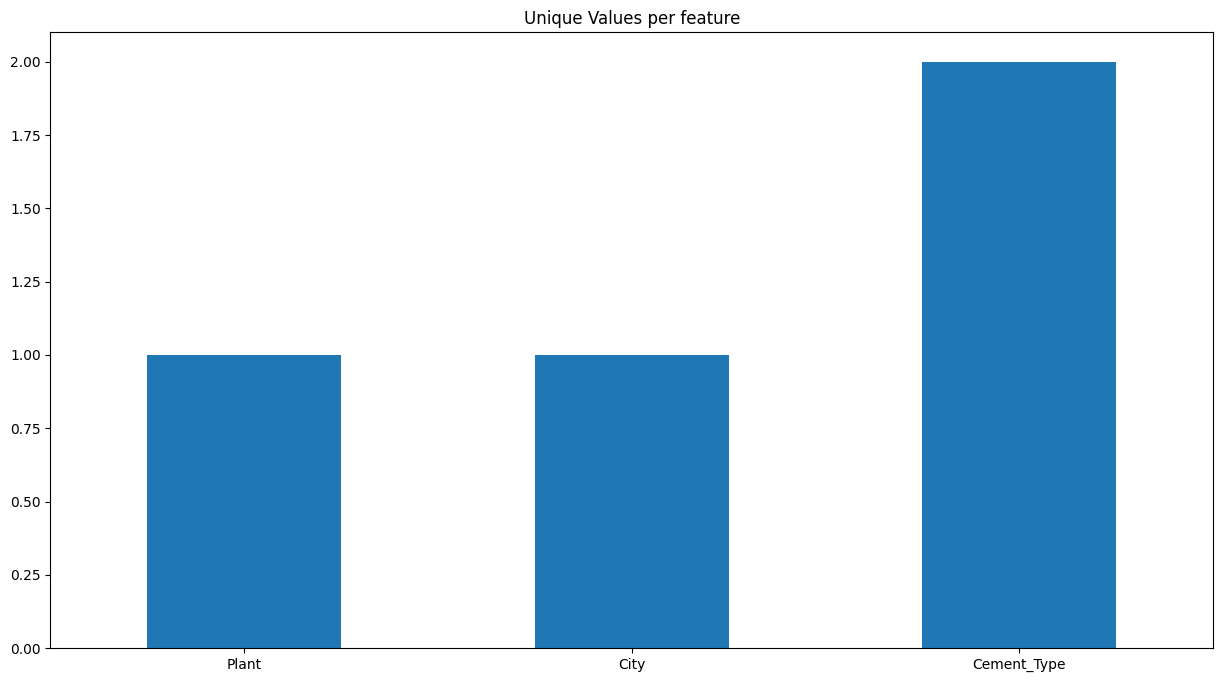

<IPython.core.display.Javascript object>

In [47]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [48]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 50 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [49]:
df.isna().any()

Plant                            False
City                             False
Date                             False
Clínquer                          True
Fíler calcário                    True
Cinza volante                     True
Escória                           True
Argila calcinada                  True
Calcium sulfate (composition)     True
Total C3S                         True
Total C2S                         True
Alpha C2S                         True
Beta C2S                          True
Gamma C2S                         True
C4AF                              True
C3A                               True
Cubic C3A                         True
Orthorhombic C3A                  True
Free CaO                          True
Portlandite                       True
Periclase                         True
Arcanite                          True
Aphthitalite                      True
Langbeinite                       True
Calcium sulfate                   True
Bassanite                

<IPython.core.display.Javascript object>

In [50]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [51]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

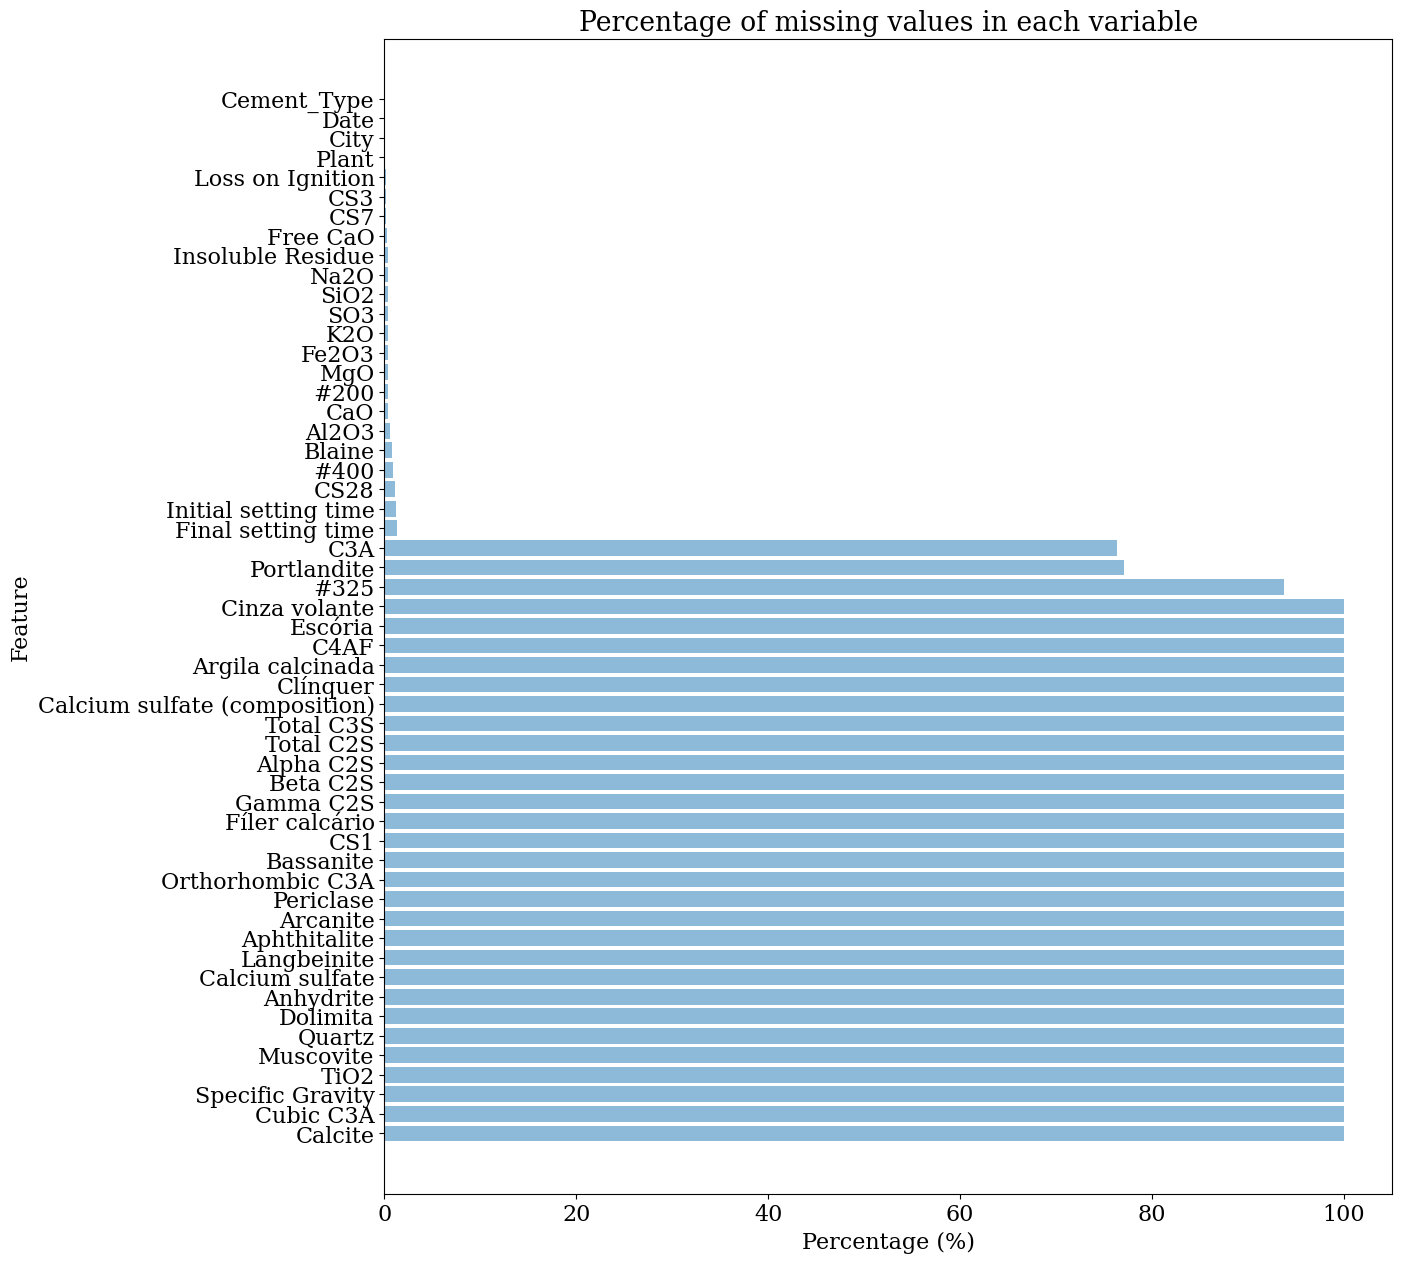

<IPython.core.display.Javascript object>

In [52]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [53]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [54]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['Clínquer', 'Fíler calcário', 'Cinza volante', 'Escória',
       'Argila calcinada', 'Calcium sulfate (composition)', 'Total C3S',
       'Total C2S', 'Alpha C2S', 'Beta C2S', 'Gamma C2S', 'C4AF', 'C3A',
       'Cubic C3A', 'Orthorhombic C3A', 'Free CaO', 'Portlandite', 'Periclase',
       'Arcanite', 'Aphthitalite', 'Langbeinite', 'Calcium sulfate',
       'Bassanite', 'Anhydrite', 'Calcite', 'Dolimita', 'Quartz', 'Muscovite',
       'CaO', 'MgO', 'Na2O', 'Al2O3', 'SiO2', 'SO3', 'K2O', 'TiO2', 'Fe2O3',
       'Loss on Ignition', 'Insoluble Residue', 'Blaine', '#200', '#325',
       '#400', 'Specific Gravity', 'Initial setting time',
       'Final setting time', 'CS1', 'CS3', 'CS7', 'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [55]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [56]:
zero_percentages

Zero (%) for S
#200                                90.740741
#325                                 6.283069
Clínquer                             0.000000
Fe2O3                                0.000000
Muscovite                            0.000000
CaO                                  0.000000
MgO                                  0.000000
Na2O                                 0.000000
Al2O3                                0.000000
SiO2                                 0.000000
SO3                                  0.000000
K2O                                  0.000000
TiO2                                 0.000000
Insoluble Residue                    0.000000
Loss on Ignition                     0.000000
Fíler calcário                       0.000000
Blaine                               0.000000
#400                                 0.000000
Specific Gravity                     0.000000
Initial setting time                 0.000000
Final setting time                   0.000000
CS1                                  0.000000
CS3                                  0.000000
CS7                                  0.000000
Quartz                               0.000000
Dolimita                             0.000000
Calcite                              0.000000
Anhydrite                            0.000000
Cinza volante                        0.000000
Escória                              0.000000
Argila calcinada                     0.000000
Calcium sulfate (composition)        0.000000
Total C3S                            0.000000
Total C2S                            0.000000
Alpha C2S                            0.000000
Beta C2S                             0.000000
Gamma C2S                            0.000000
C4AF                                 0.000000
C3A                                  0.000000
Cubic C3A                            0.000000
Orthorhombic C3A                     0.000000
Free CaO                             0.000000
Portlandite                          0.000000
Periclase                            0.000000
Arcanite                             0.000000
Aphthitalite                         0.000000
Langbeinite                          0.000000
Calcium sulfate                      0.000000
Bassanite                            0.000000
CS28                                 0.000000

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [57]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

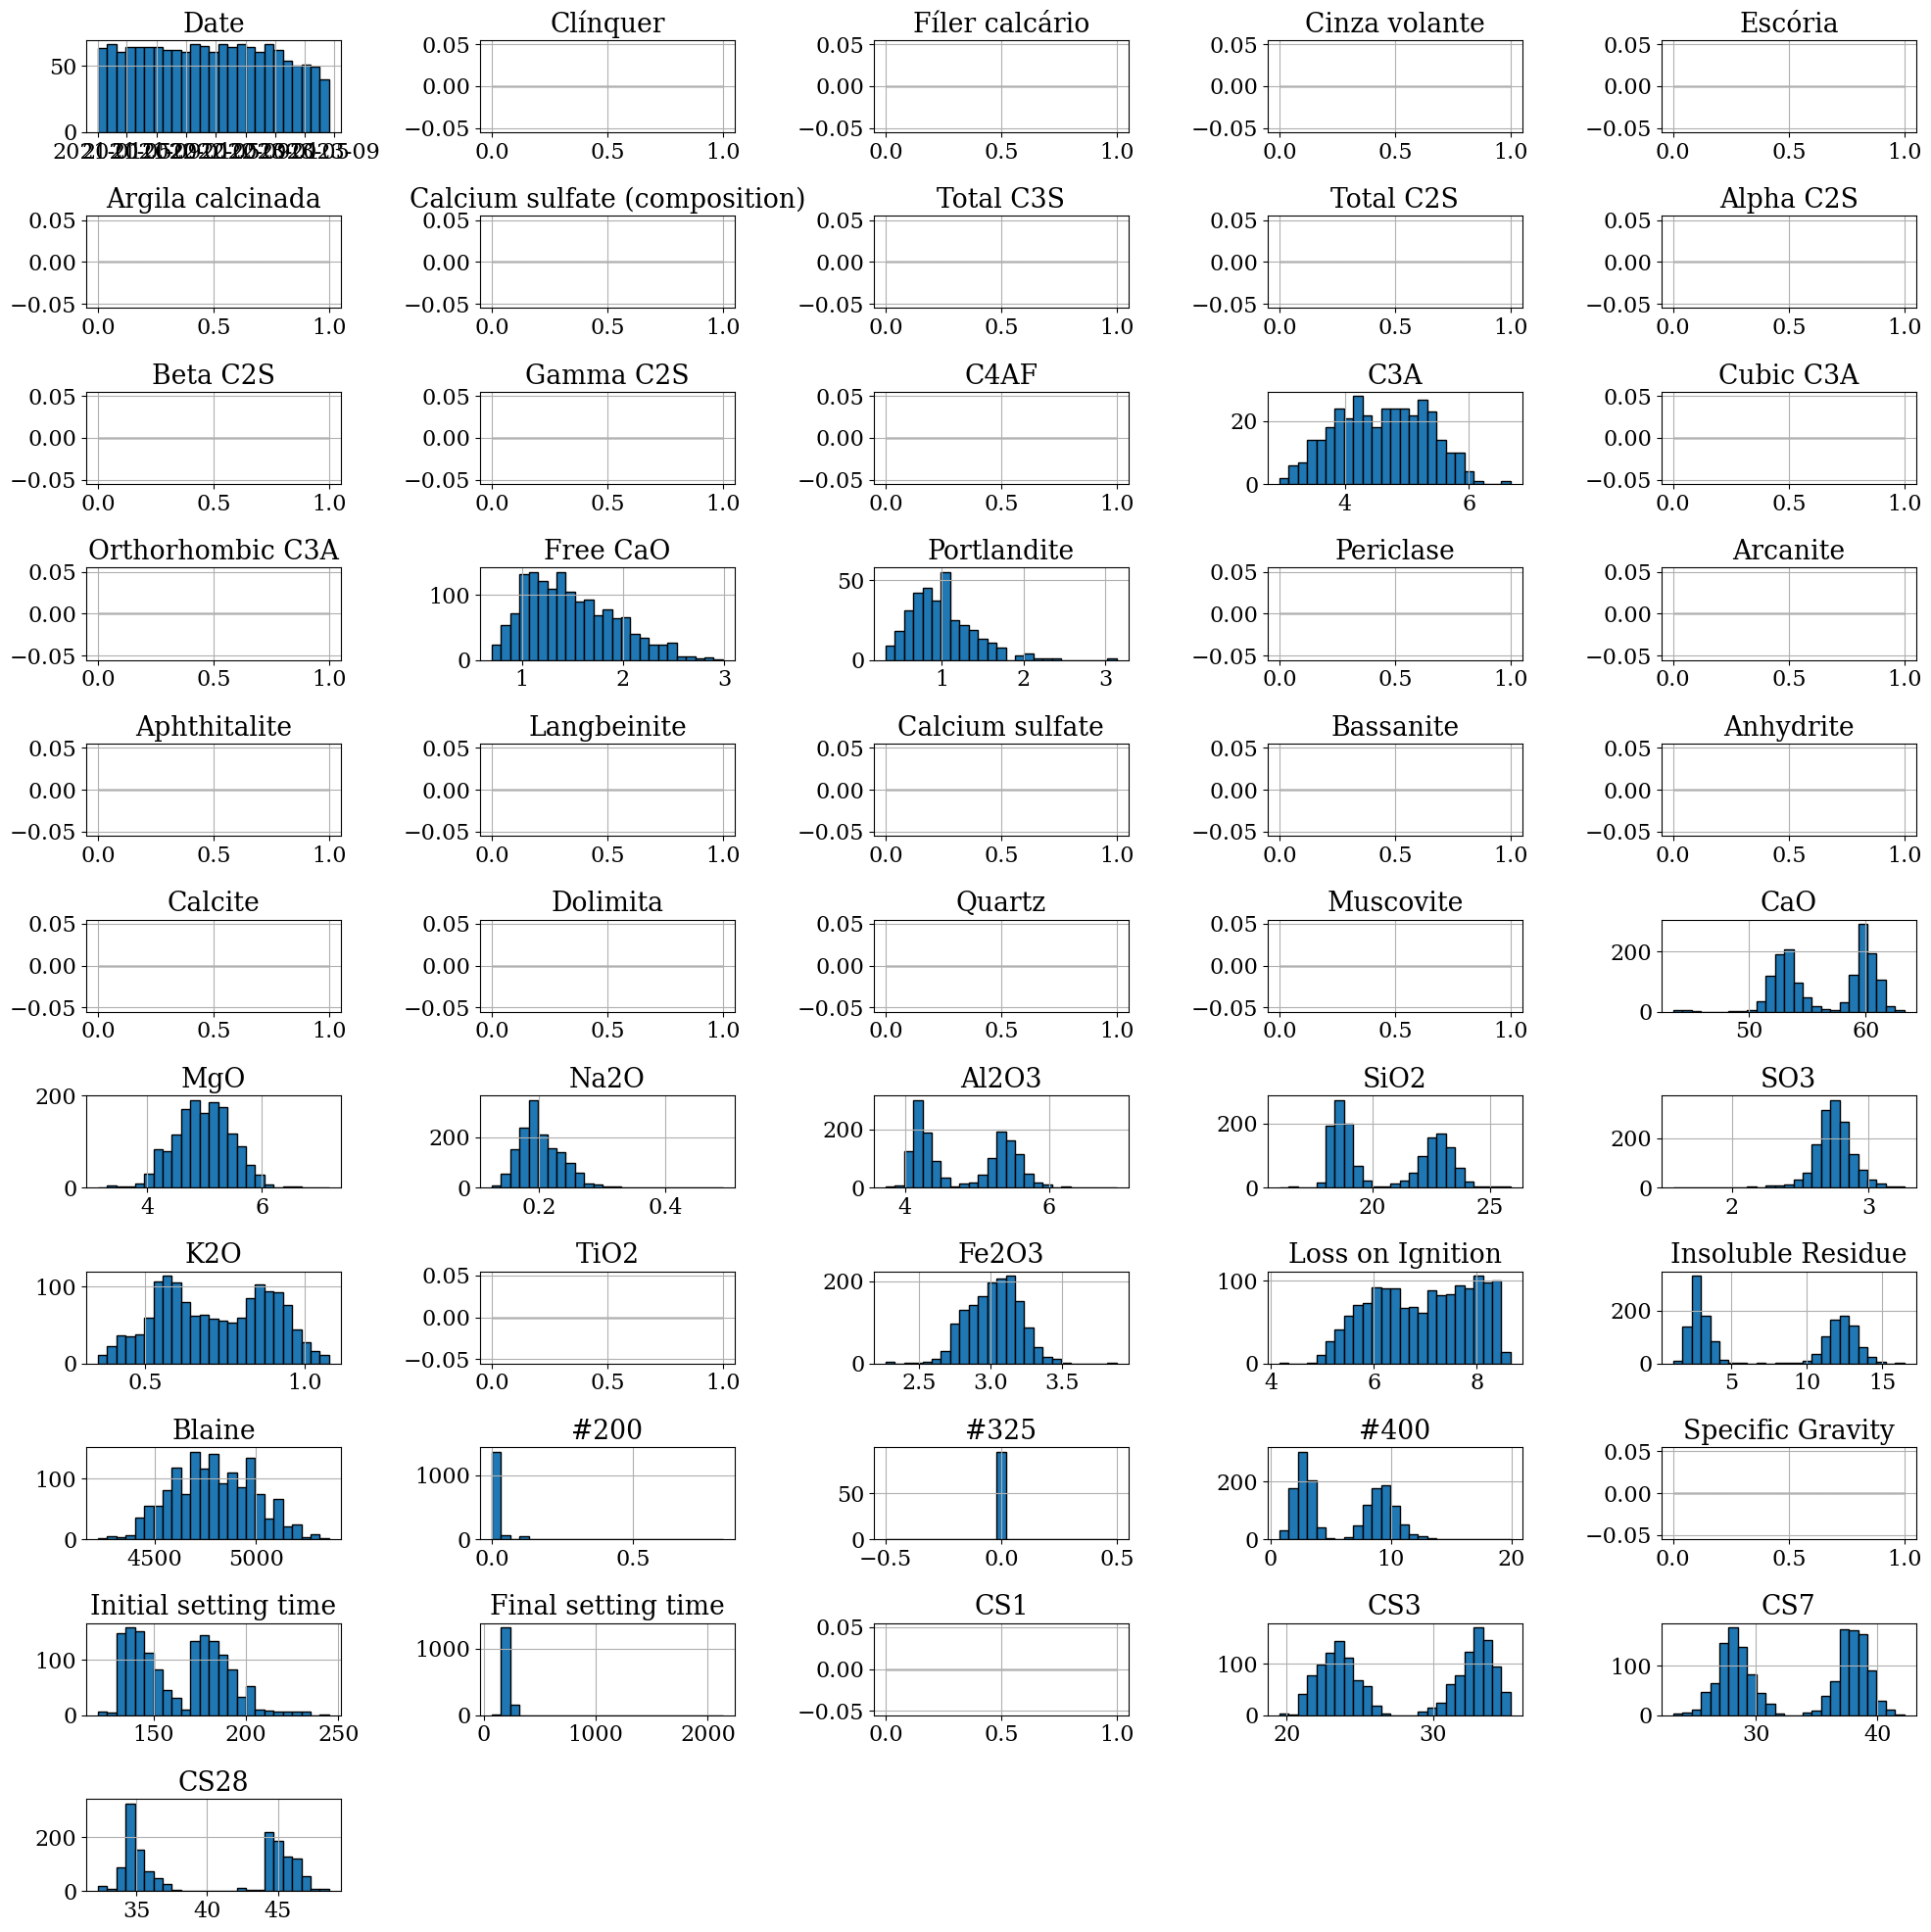

<IPython.core.display.Javascript object>

In [58]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

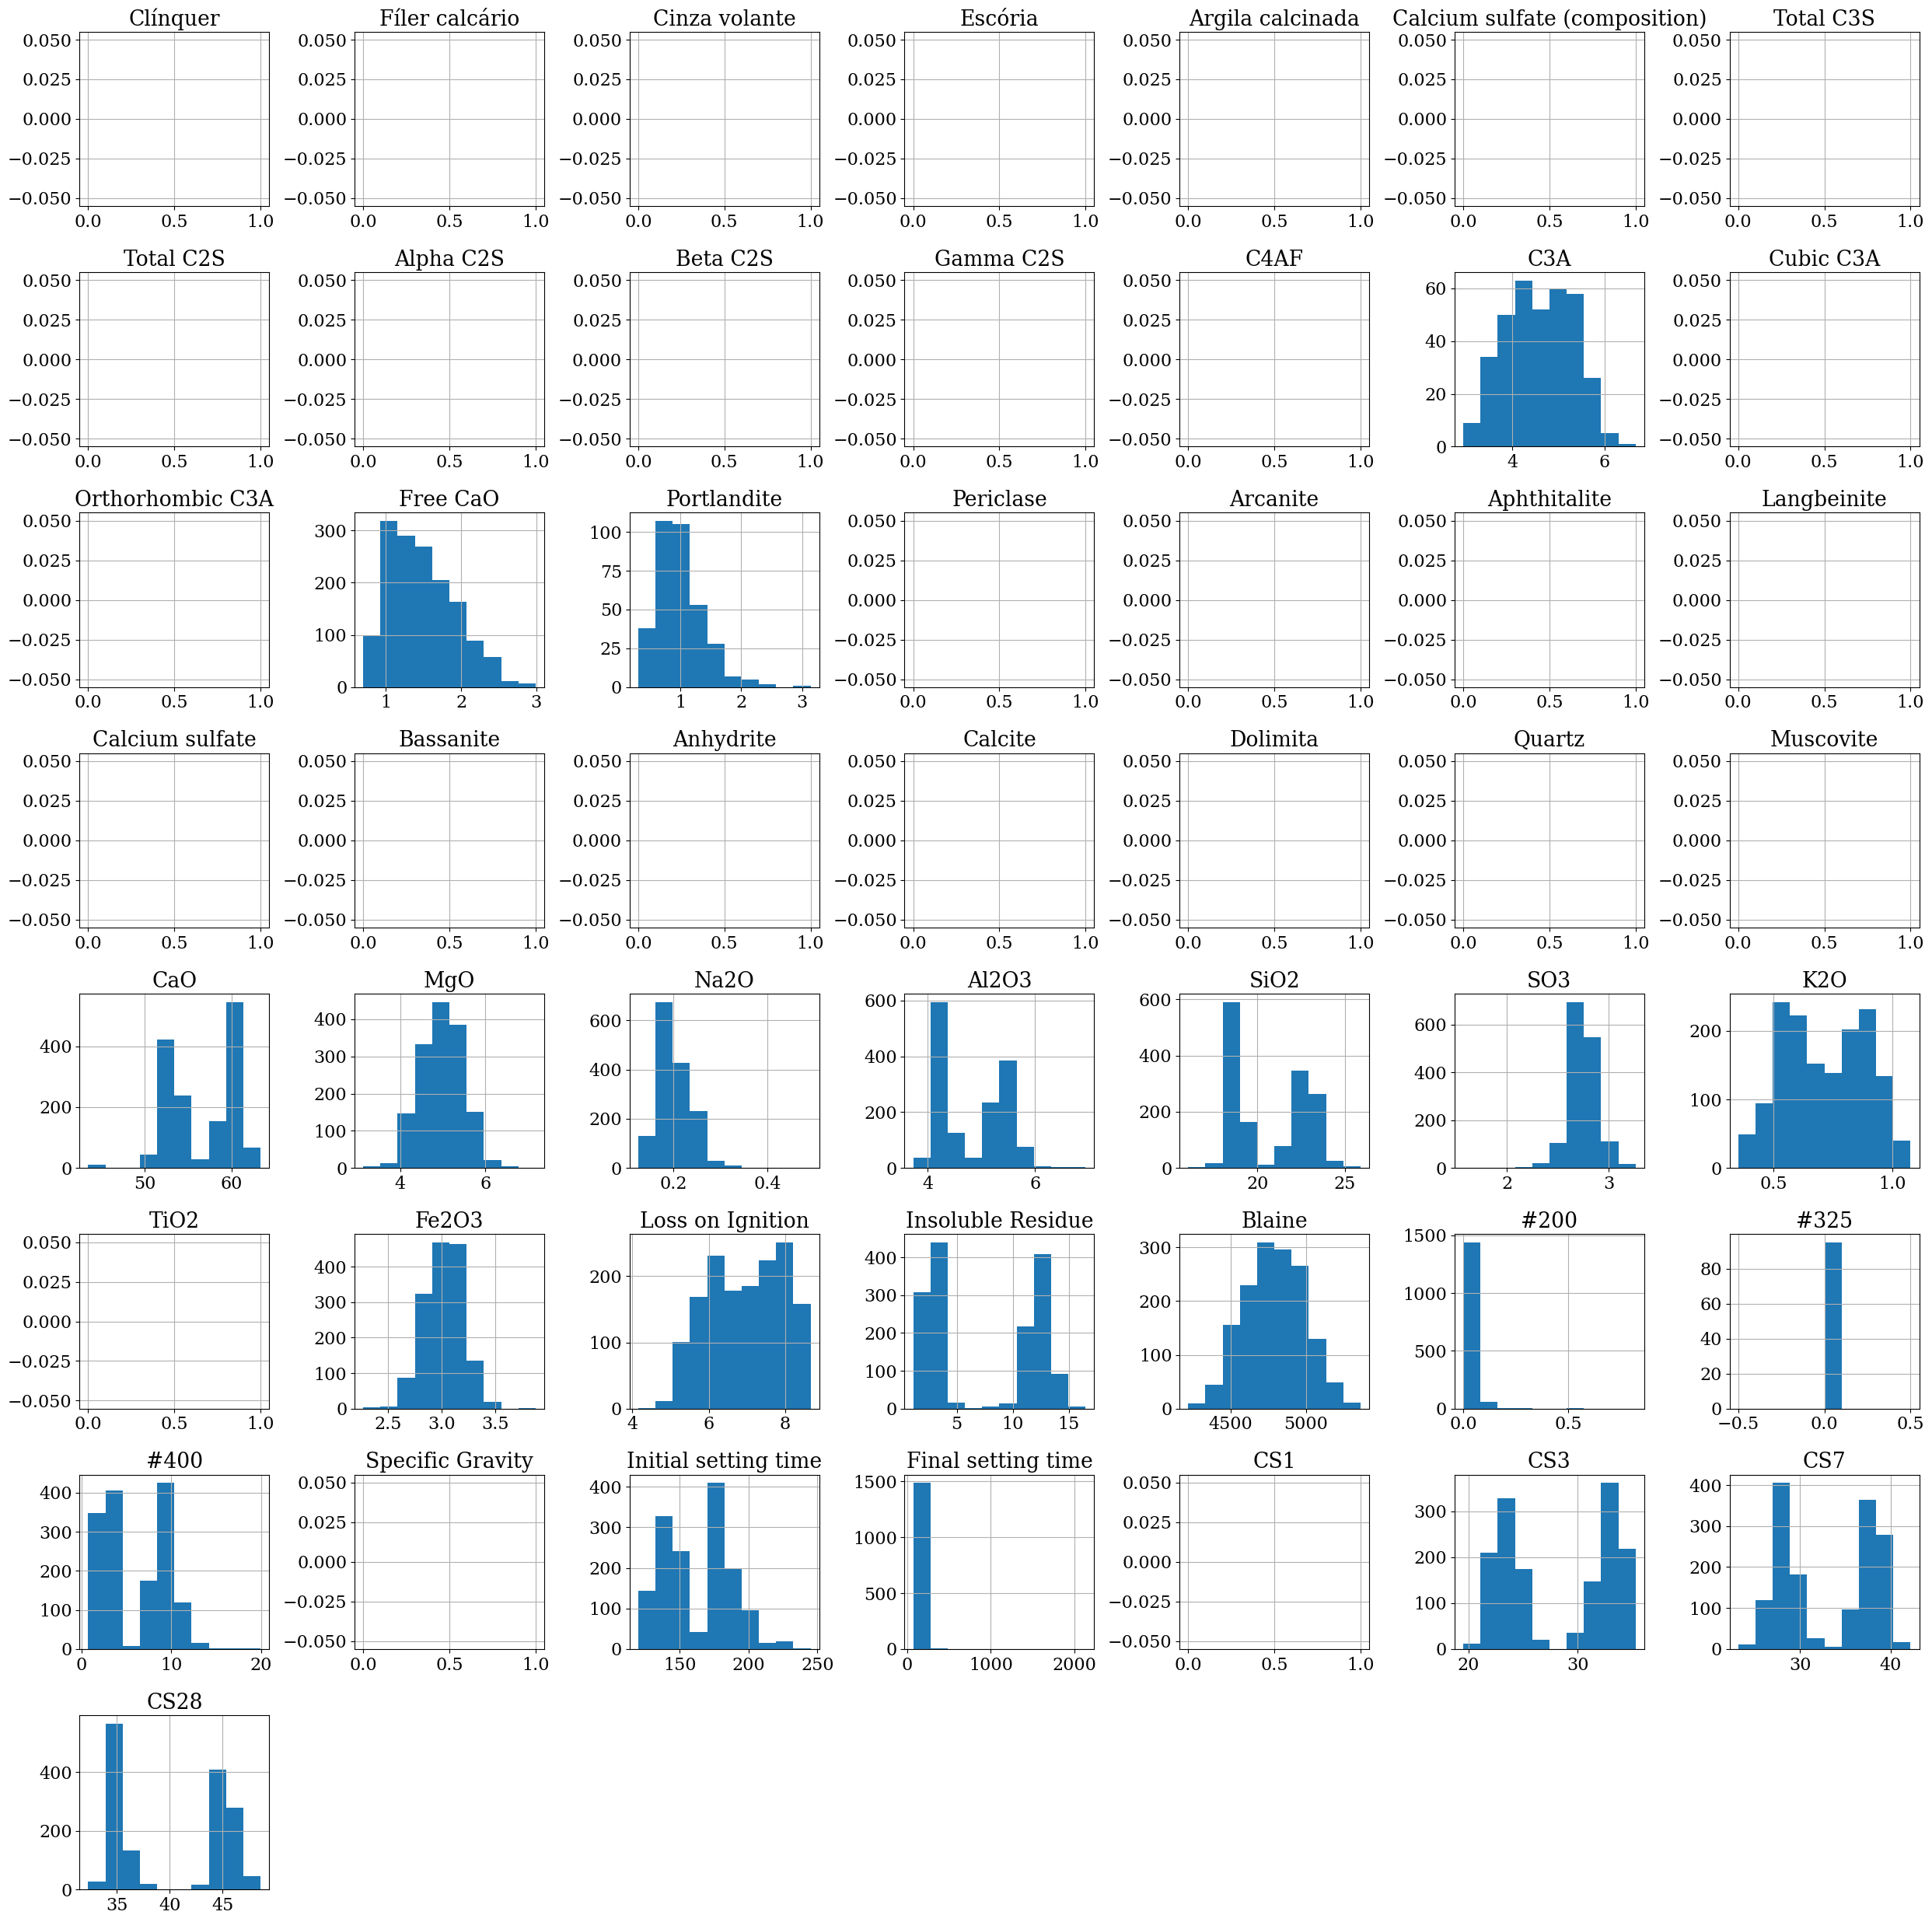

<IPython.core.display.Javascript object>

In [59]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

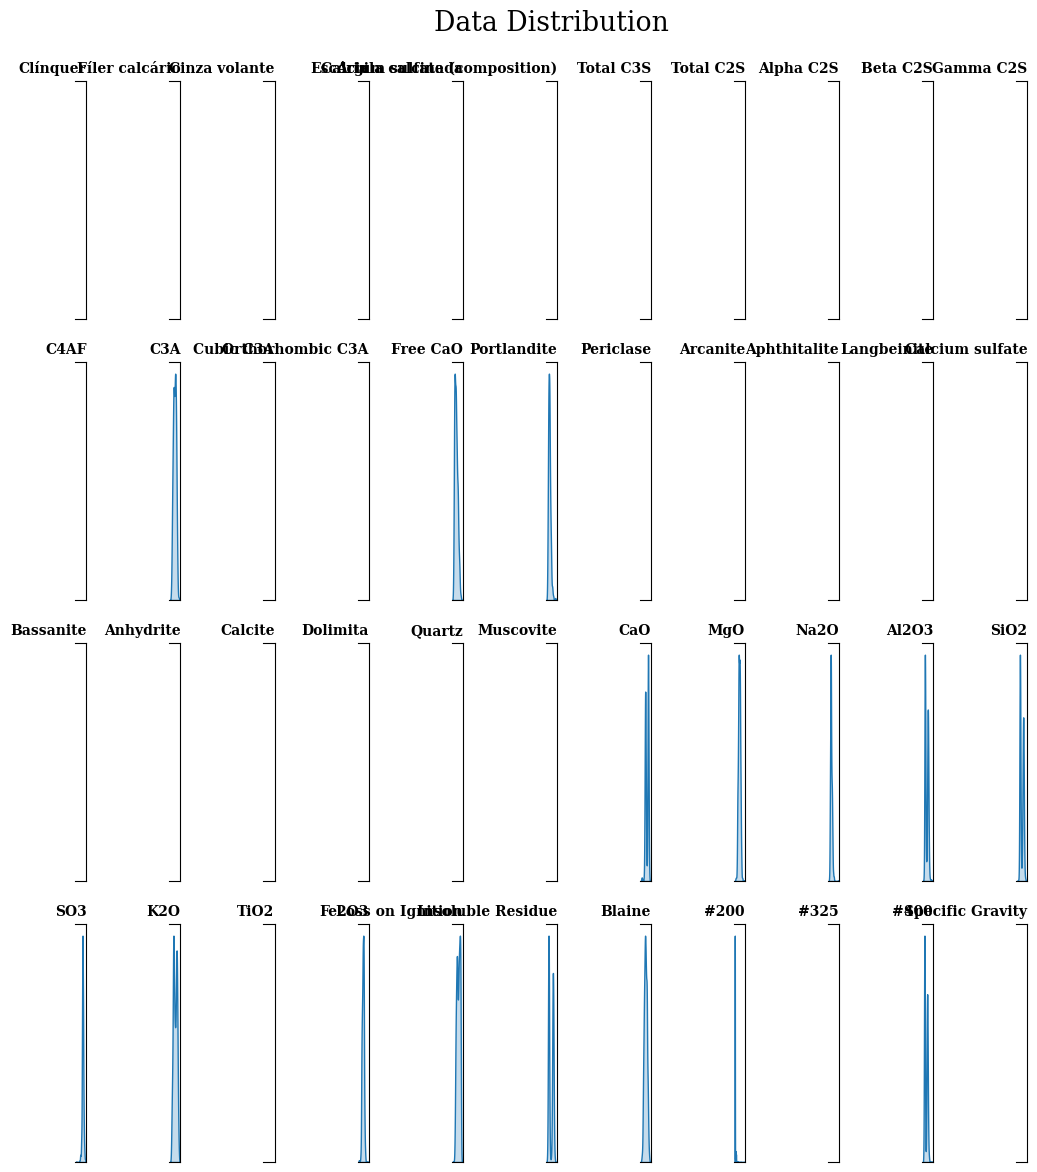

<IPython.core.display.Javascript object>

In [60]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 11, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").select_dtypes(exclude=object).columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

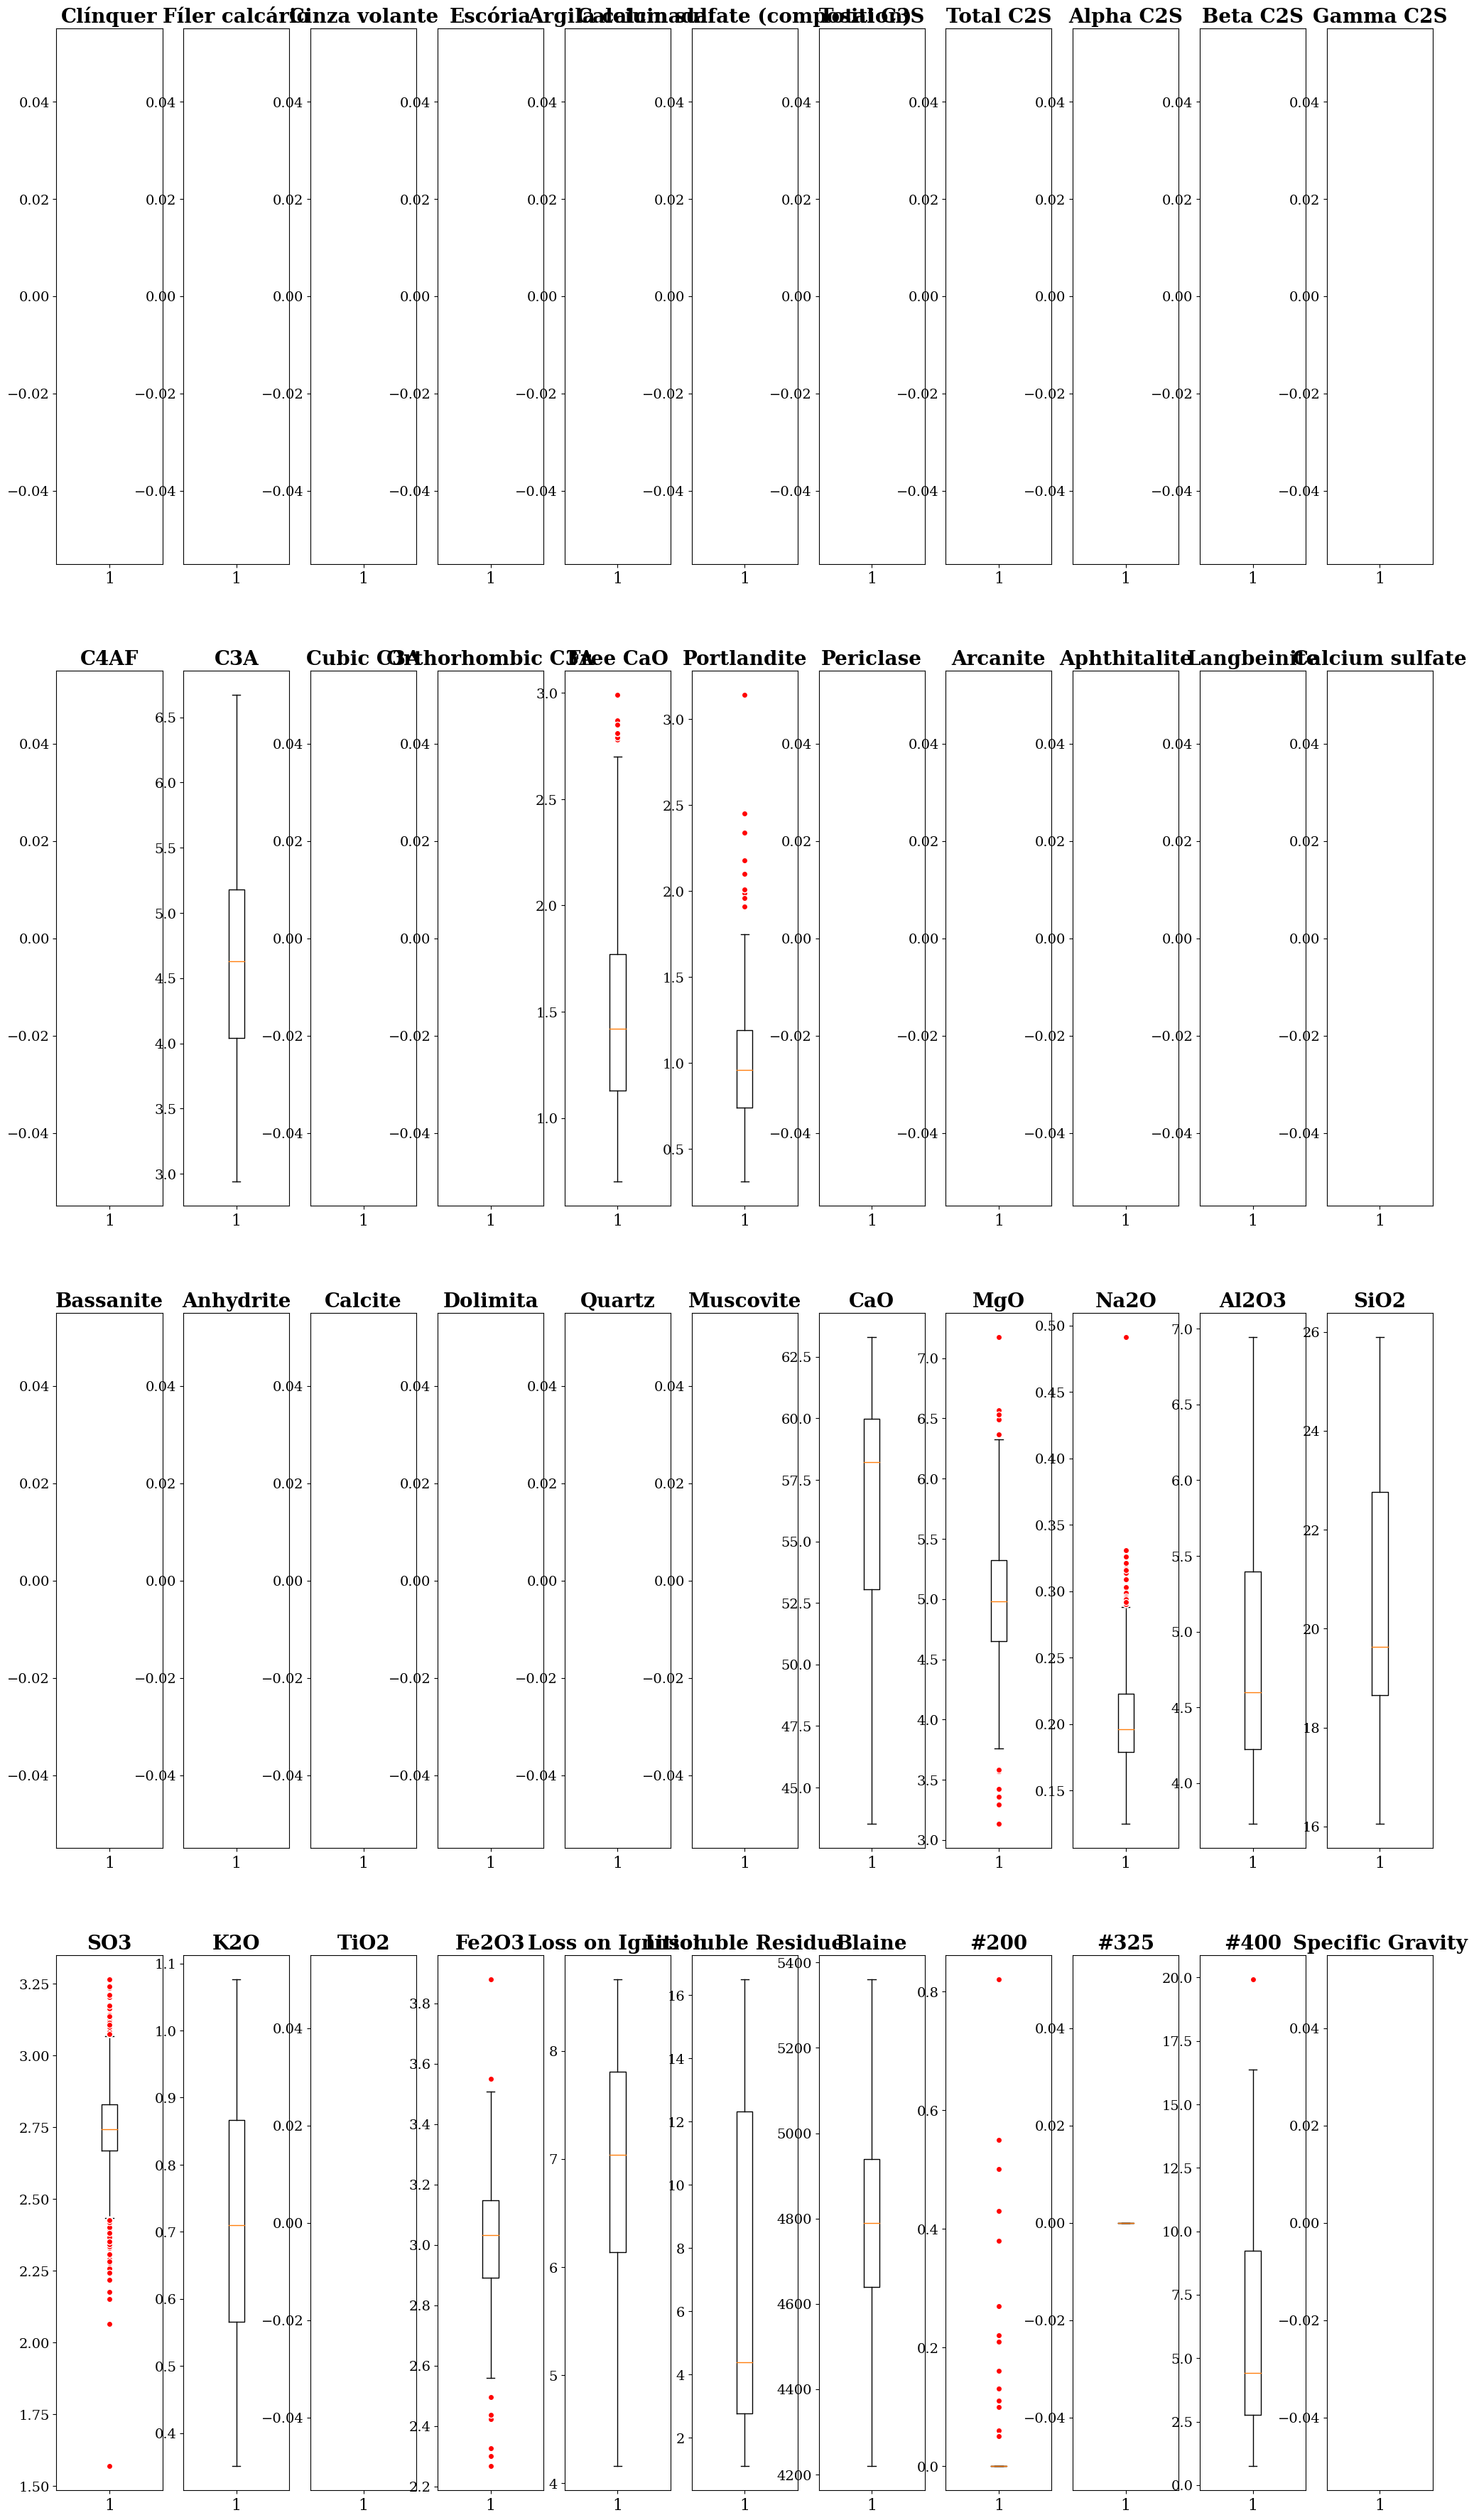

<IPython.core.display.Javascript object>

In [61]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(4, 11, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

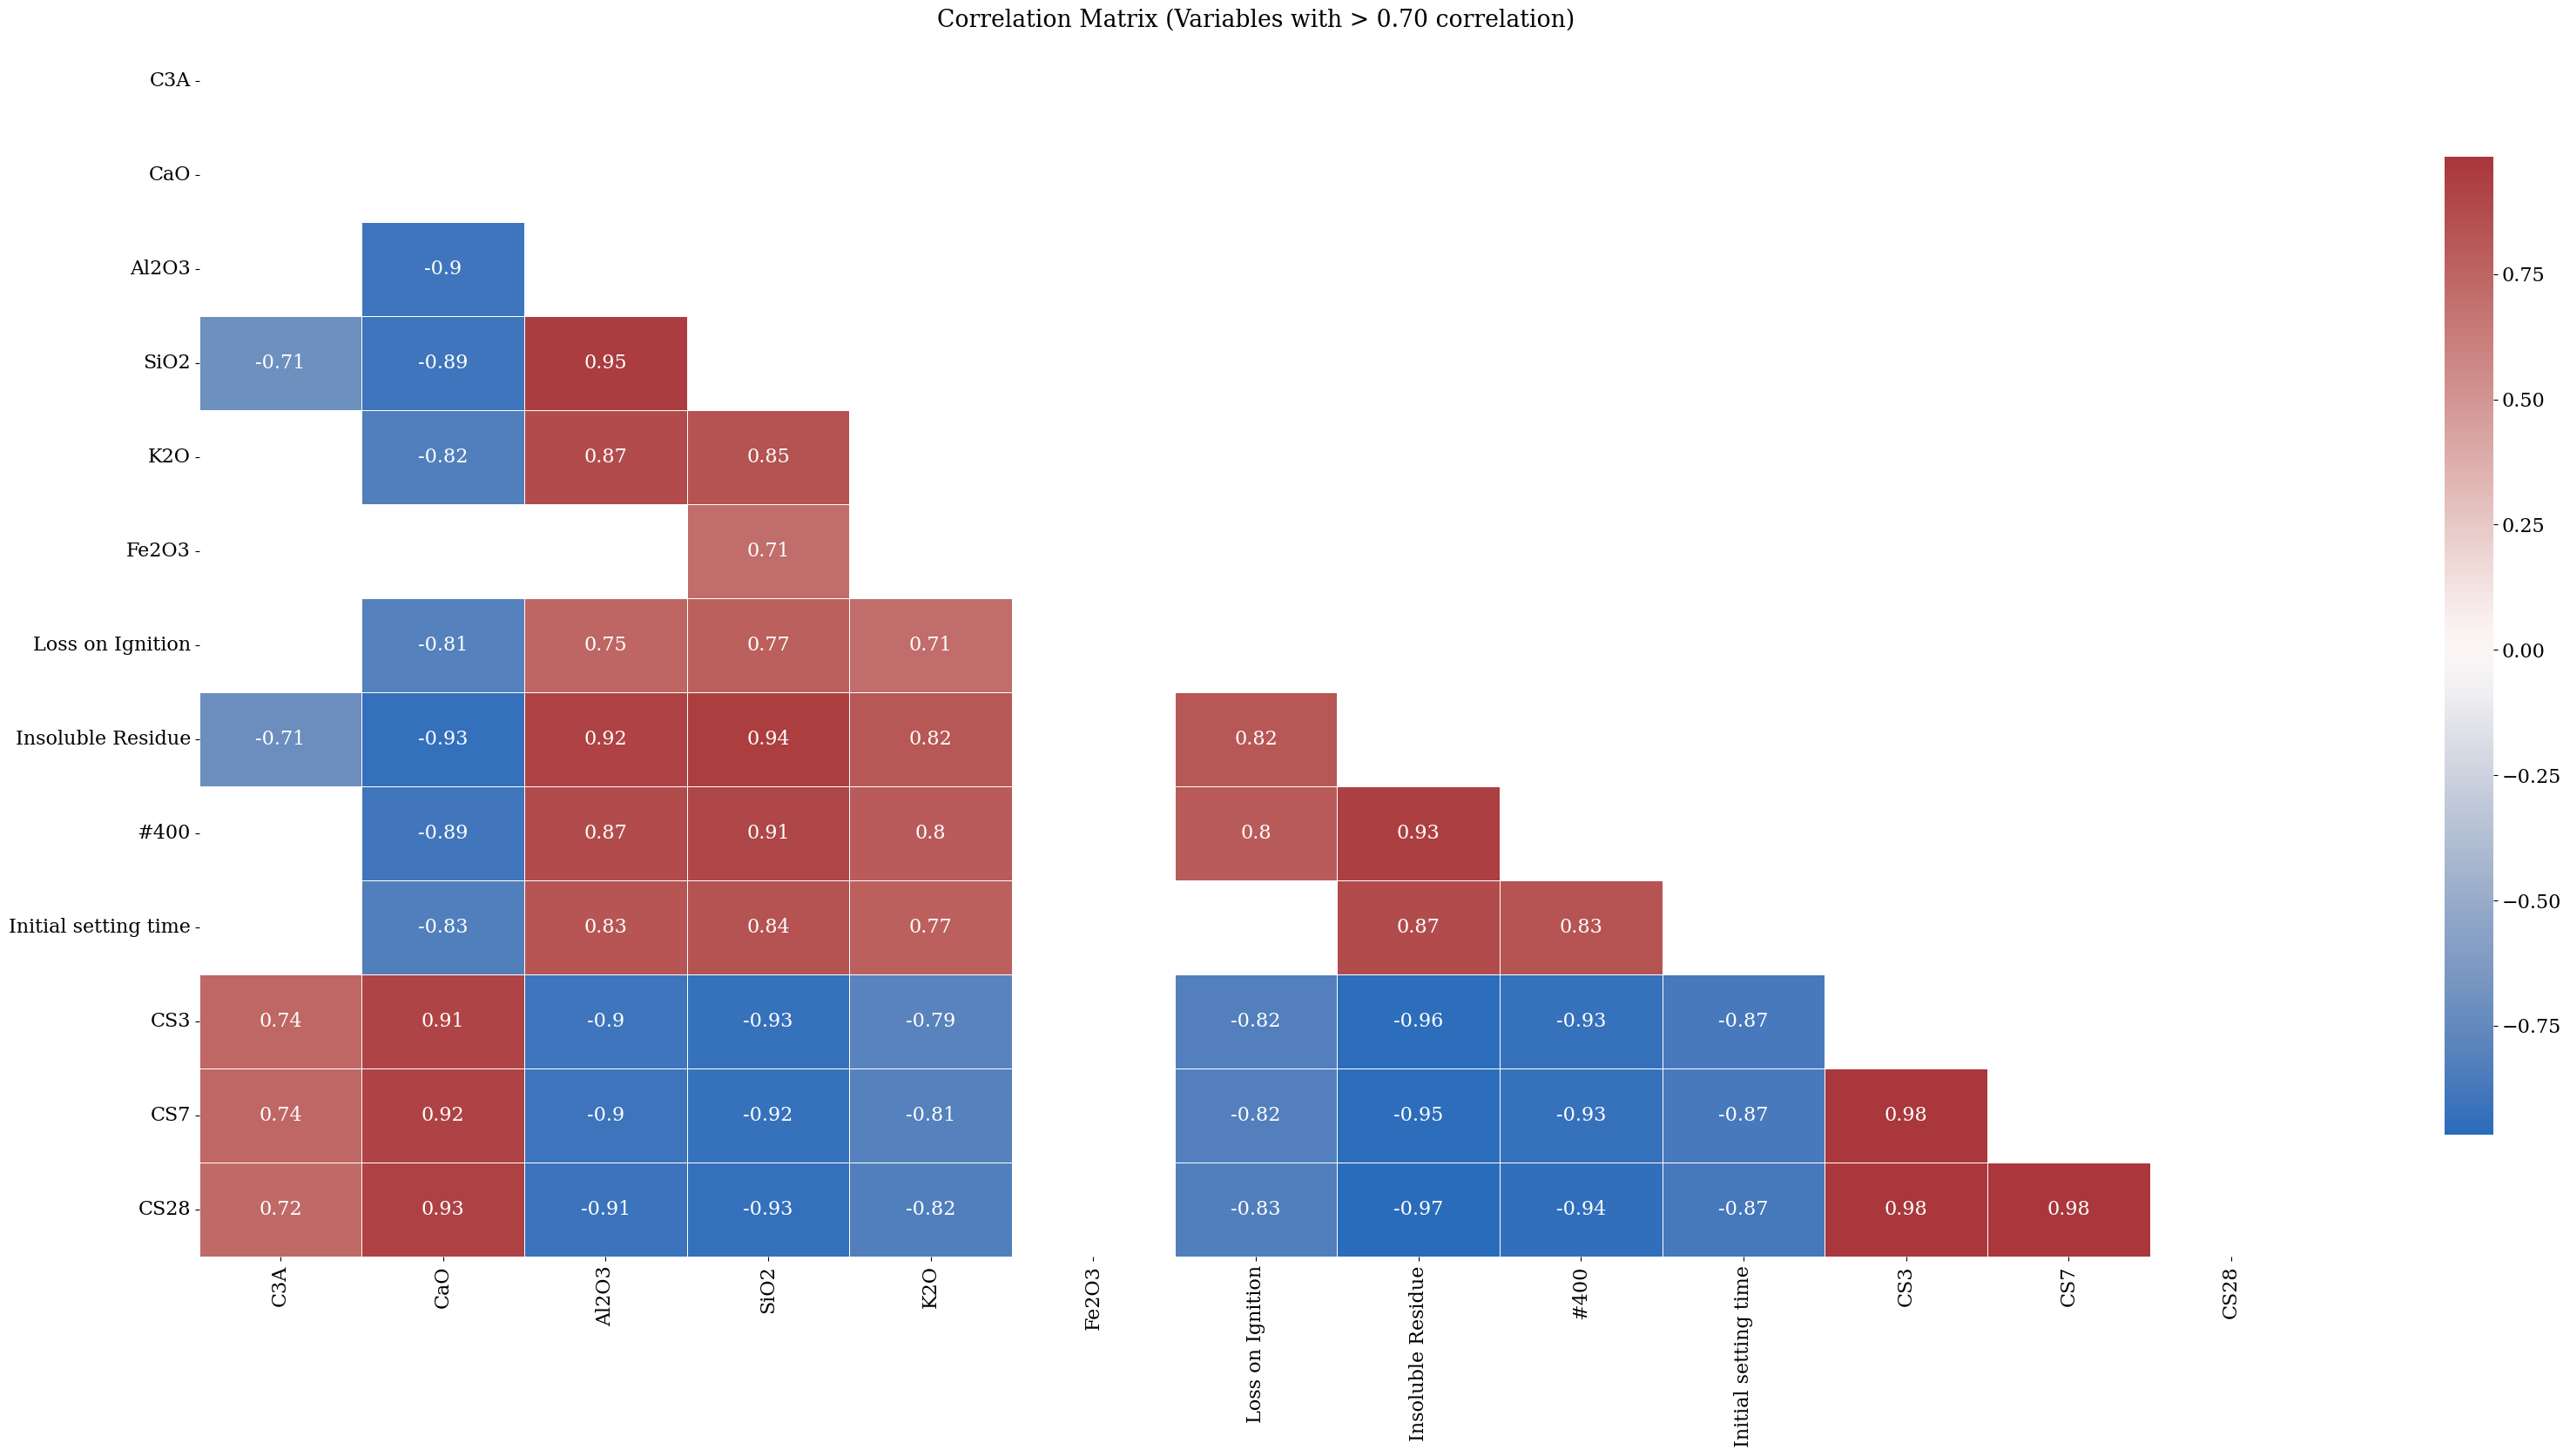

<IPython.core.display.Javascript object>

In [62]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [63]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                   CS7                     0.984676
CS7                   CS28                    0.984274
CS3                   CS28                    0.977594
Insoluble Residue     CS28                    0.967476
                      CS3                     0.956138
                      CS7                     0.953581
Al2O3                 SiO2                    0.948220
SiO2                  Insoluble Residue       0.943538
#400                  CS28                    0.938059
Insoluble Residue     #400                    0.933524
CaO                   Insoluble Residue       0.931829
SiO2                  CS28                    0.930994
                      CS3                     0.928276
#400                  CS3                     0.927243
CaO                   CS28                    0.925940
#400                  CS7                     0.925087
SiO2                  CS7                     0.924358
Al2O3                 Insoluble Residue       0.918171
CaO       

<IPython.core.display.Javascript object>

In [64]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.984274
CS3                   CS28    0.977594
Insoluble Residue     CS28    0.967476
#400                  CS28    0.938059
SiO2                  CS28    0.930994
CaO                   CS28    0.925940
Al2O3                 CS28    0.910757
Initial setting time  CS28    0.874851
Loss on Ignition      CS28    0.825836
K2O                   CS28    0.824590
C3A                   CS28    0.722427
Fe2O3                 CS28    0.619385
Final setting time    CS28    0.426823
MgO                   CS28    0.417559
Blaine                CS28    0.383356
#200                  CS28    0.225764
SO3                   CS28    0.175882
Free CaO              CS28    0.161653
Portlandite           CS28    0.129381
Na2O                  CS28    0.000547
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

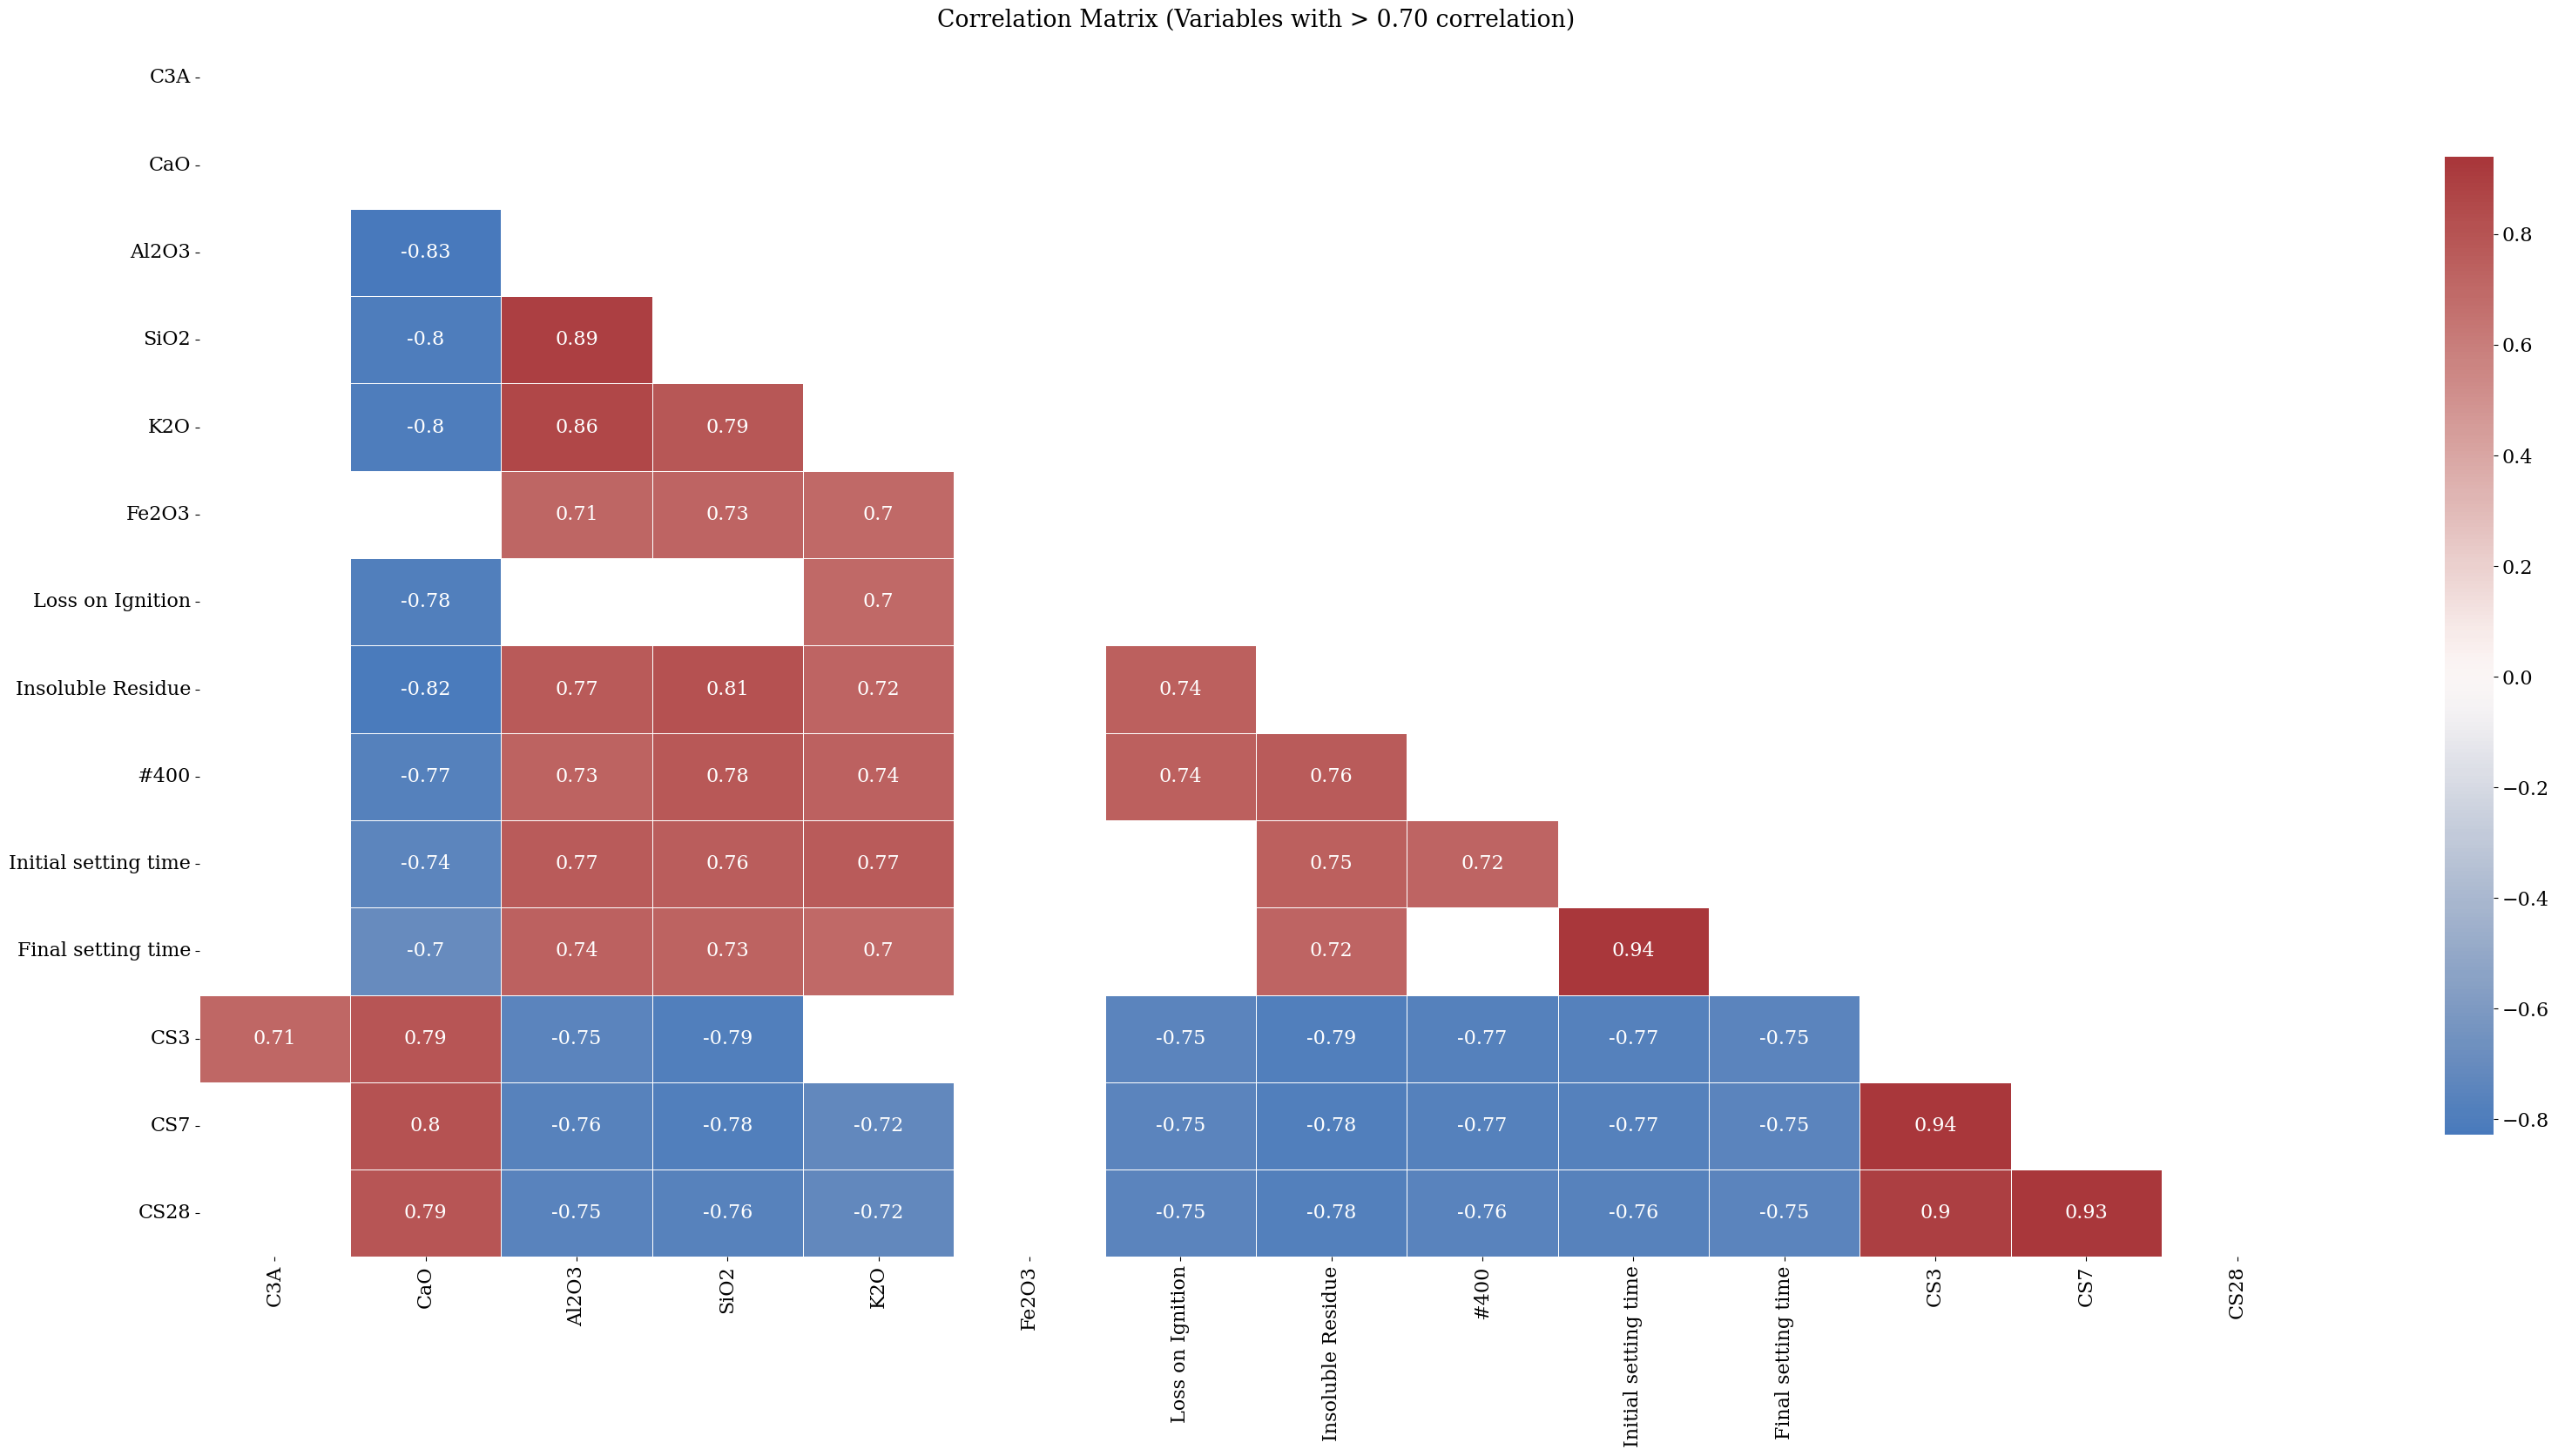

<IPython.core.display.Javascript object>

In [65]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [66]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                   CS7                   0.940307
Initial setting time  Final setting time    0.936221
CS7                   CS28                  0.931347
CS3                   CS28                  0.897438
Al2O3                 SiO2                  0.894398
                                              ...   
C3A                   CS3                   0.706344
K2O                   Loss on Ignition      0.704039
                      Final setting time    0.702187
CaO                   Final setting time    0.702025
K2O                   Fe2O3                 0.701276
Length: 64, dtype: float64

<IPython.core.display.Javascript object>

In [67]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.931347
CS3                   CS28    0.897438
CaO                   CS28    0.791881
Insoluble Residue     CS28    0.775350
Initial setting time  CS28    0.759452
SiO2                  CS28    0.758689
#400                  CS28    0.755712
Al2O3                 CS28    0.753218
Final setting time    CS28    0.748932
Loss on Ignition      CS28    0.745498
K2O                   CS28    0.717467
C3A                   CS28    0.658066
Fe2O3                 CS28    0.582554
Blaine                CS28    0.325784
MgO                   CS28    0.324472
#200                  CS28    0.313607
Portlandite           CS28    0.168688
SO3                   CS28    0.153391
Free CaO              CS28    0.141559
Na2O                  CS28    0.042015
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

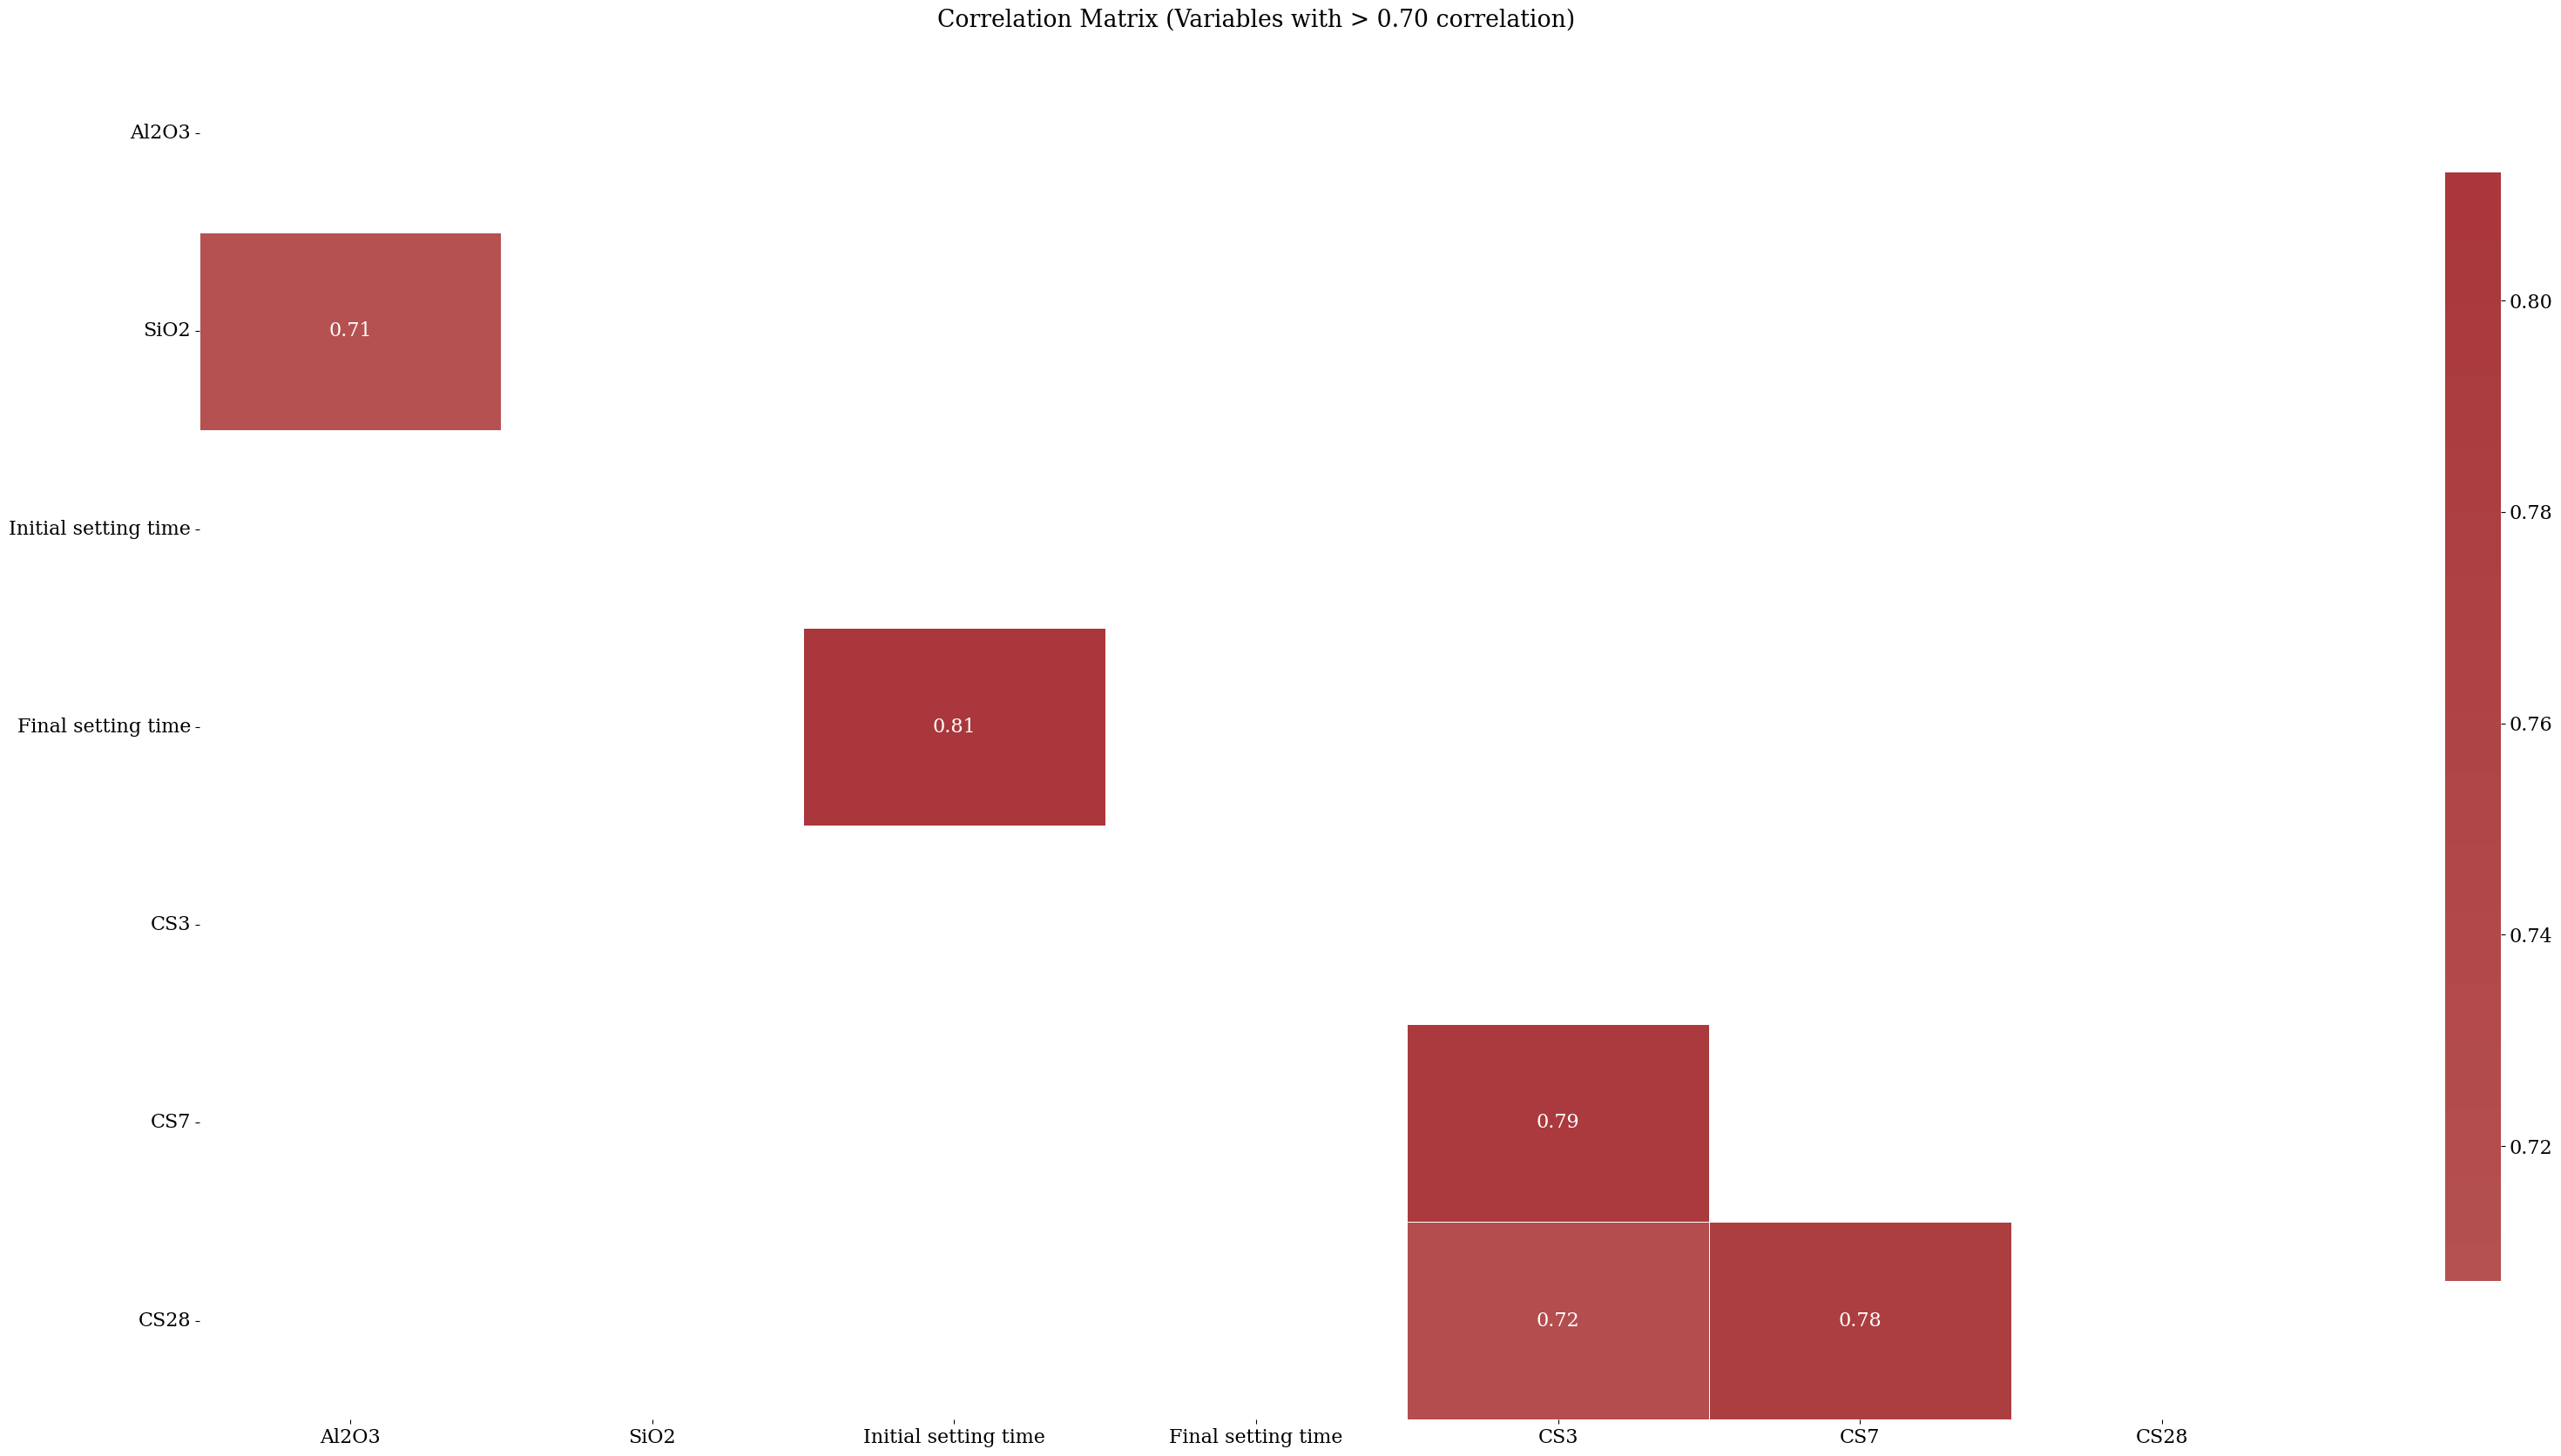

<IPython.core.display.Javascript object>

In [68]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [69]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time    0.812098
CS3                   CS7                   0.794209
CS7                   CS28                  0.781487
CS3                   CS28                  0.719877
Al2O3                 SiO2                  0.707230
dtype: float64

<IPython.core.display.Javascript object>

In [70]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.781487
CS3                   CS28    0.719877
CaO                   CS28    0.566798
Insoluble Residue     CS28    0.543775
Initial setting time  CS28    0.534523
Loss on Ignition      CS28    0.523253
Final setting time    CS28    0.522527
SiO2                  CS28    0.522257
Al2O3                 CS28    0.517700
#400                  CS28    0.513876
K2O                   CS28    0.480387
C3A                   CS28    0.432468
Fe2O3                 CS28    0.394501
#200                  CS28    0.255159
Blaine                CS28    0.220144
MgO                   CS28    0.214229
Portlandite           CS28    0.116698
SO3                   CS28    0.103752
Free CaO              CS28    0.096026
Na2O                  CS28    0.026449
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

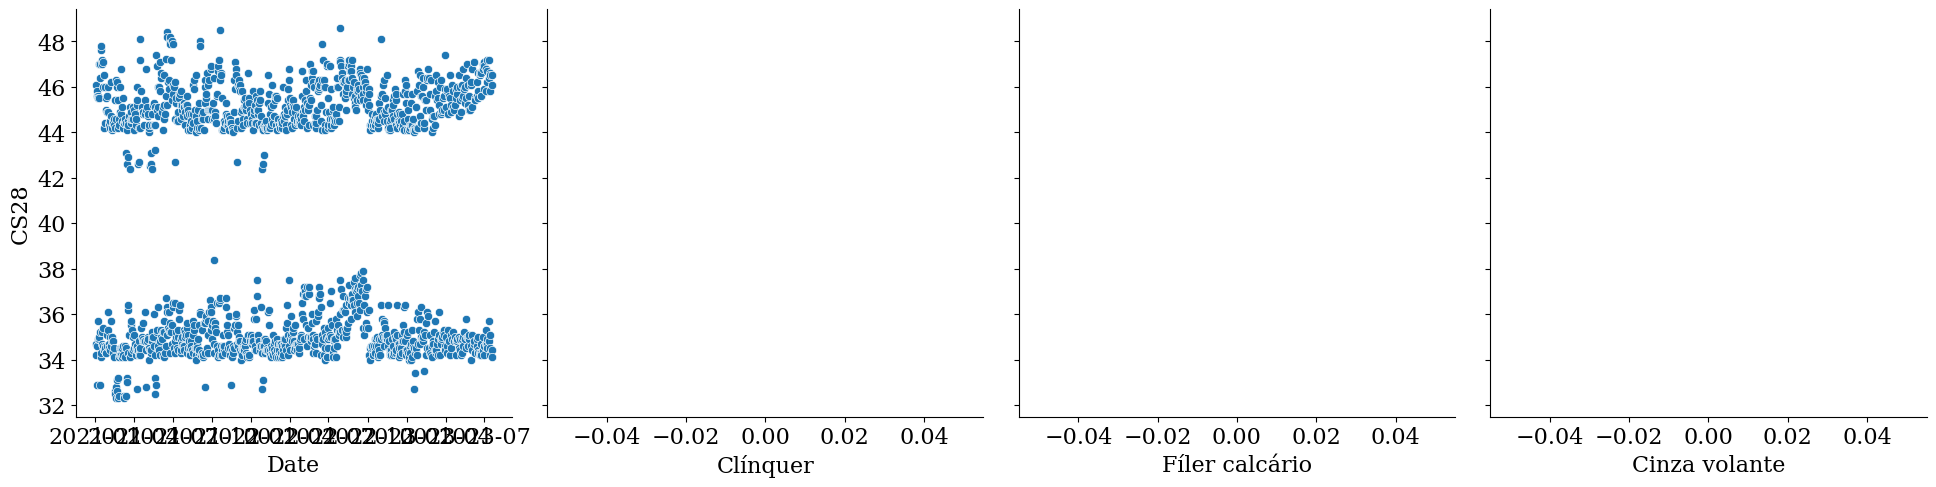

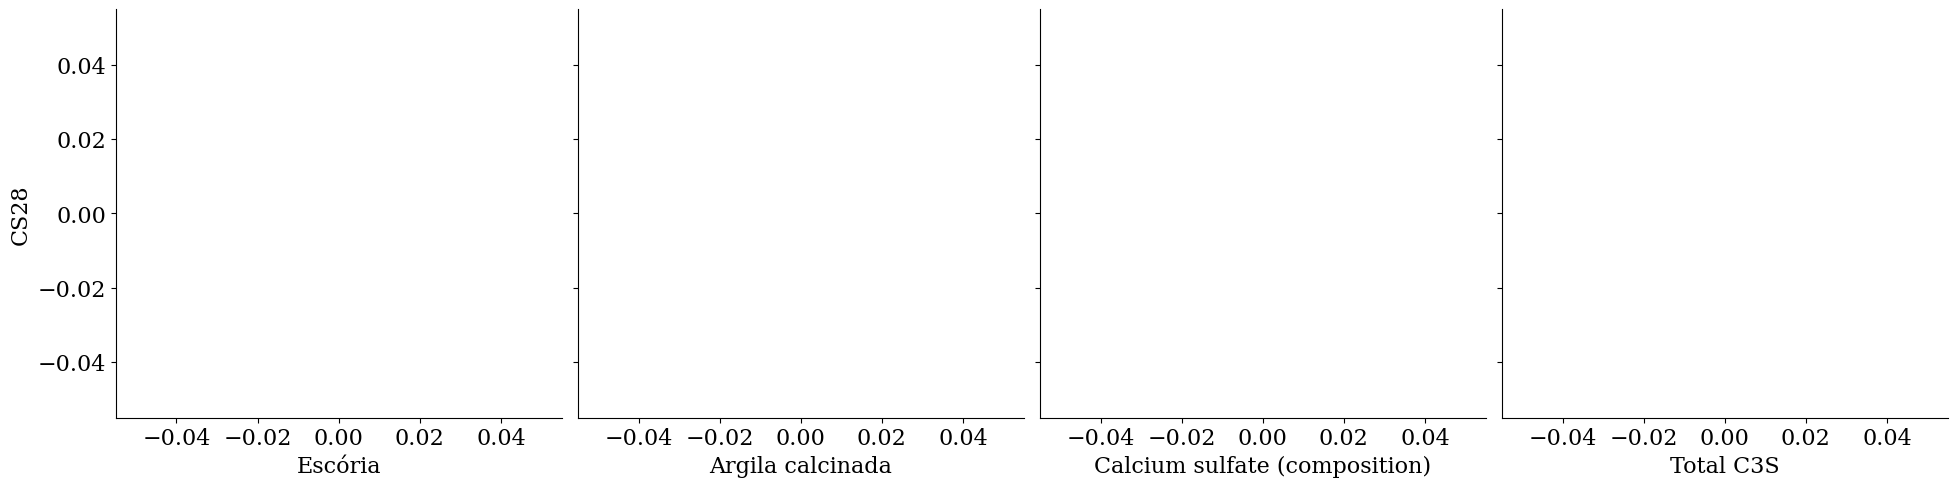

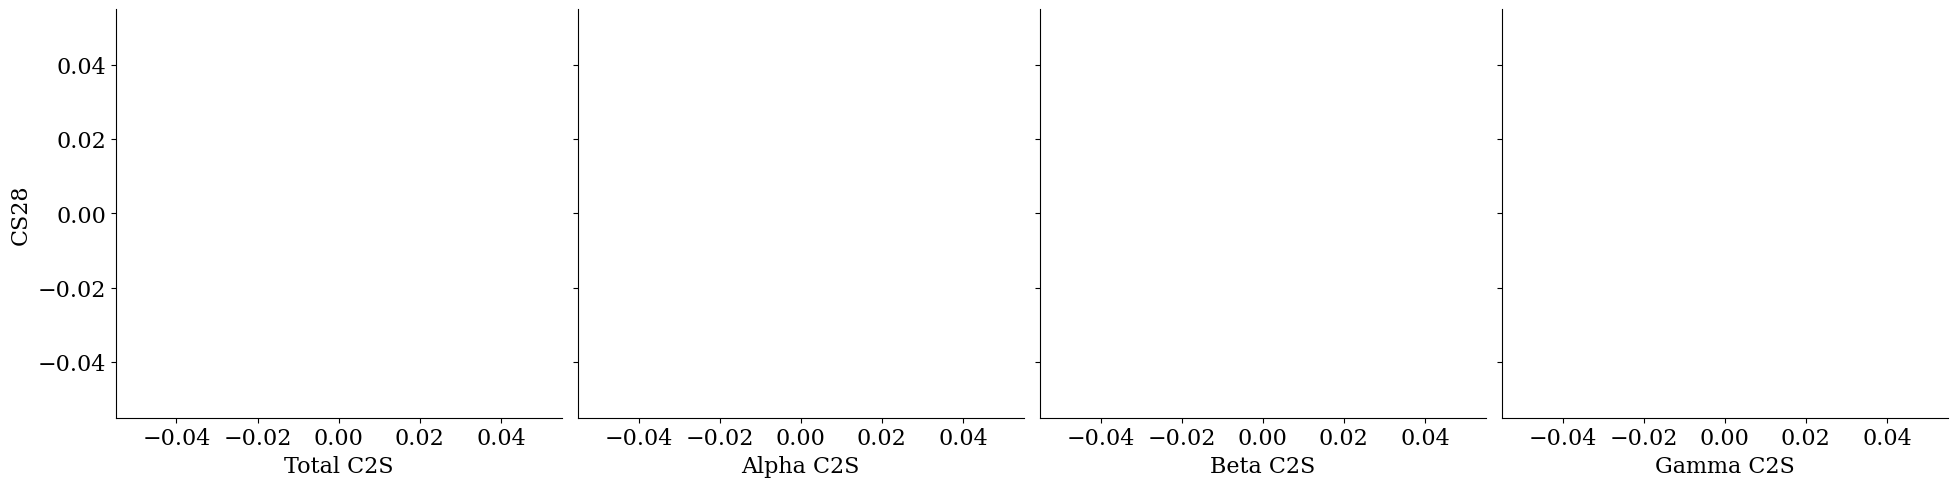

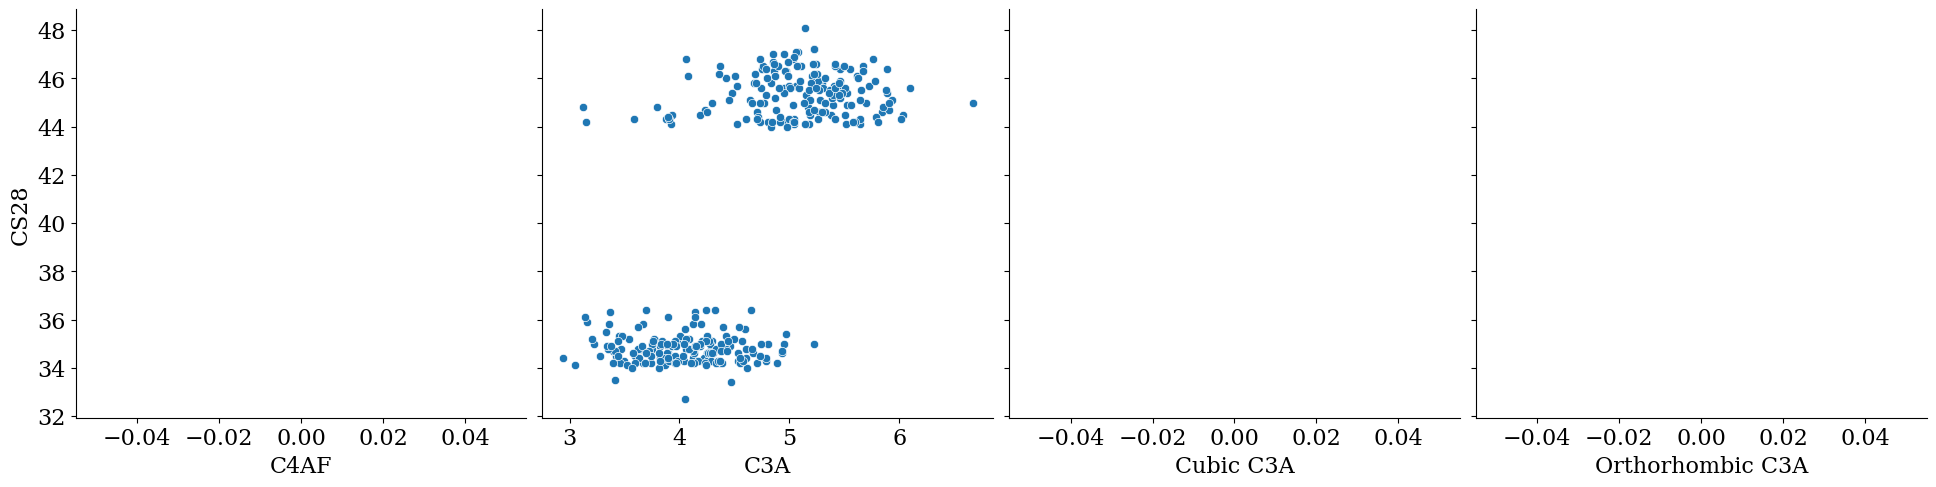

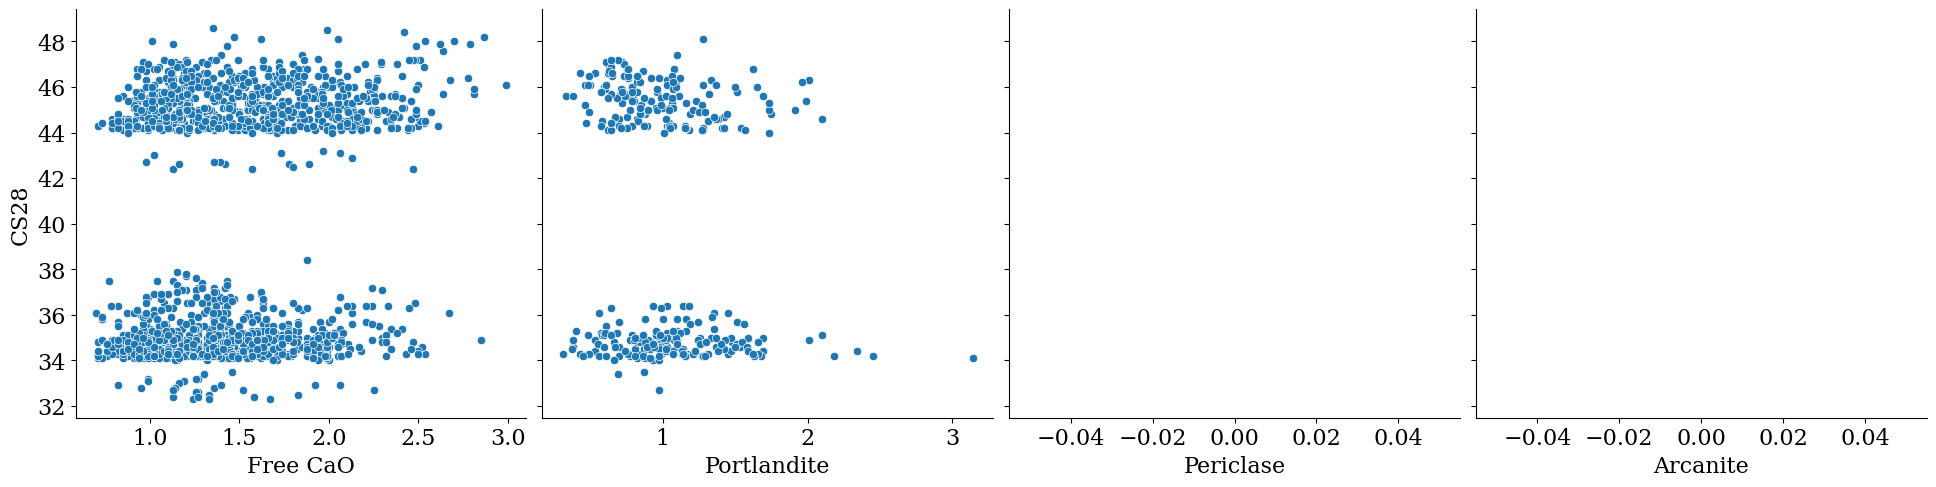

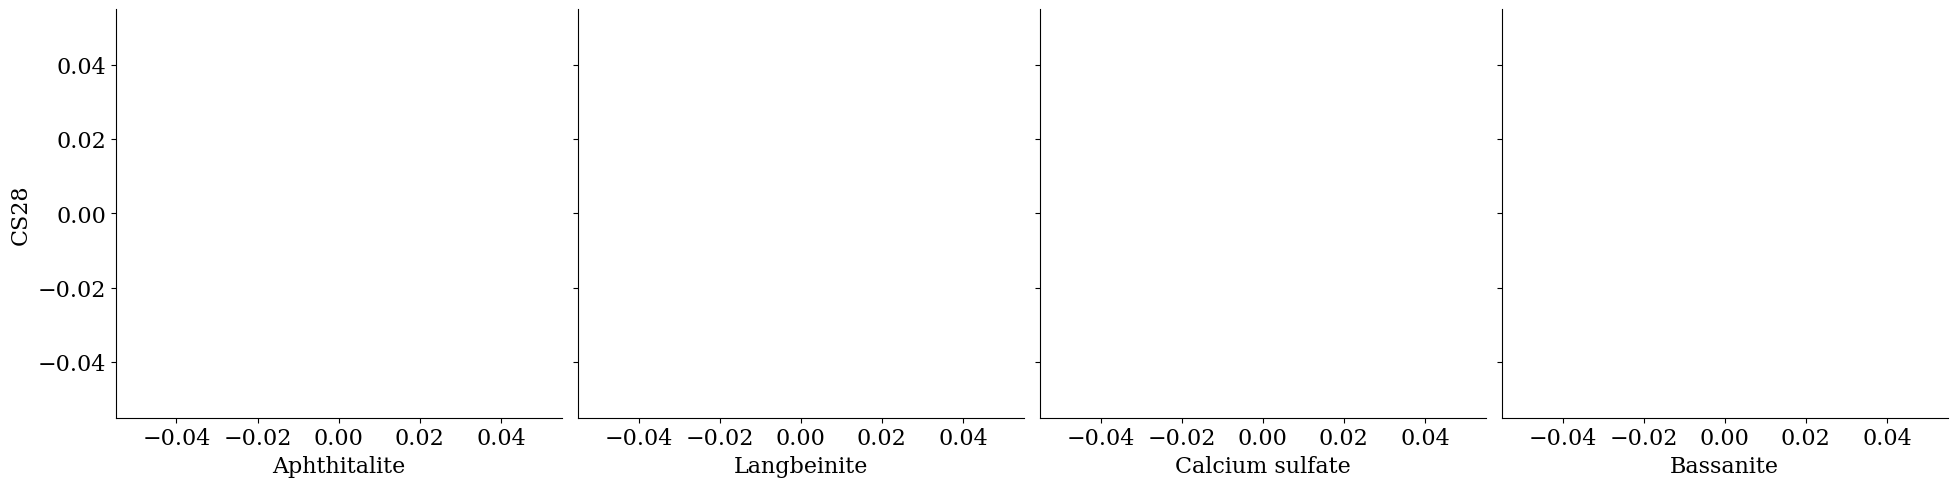

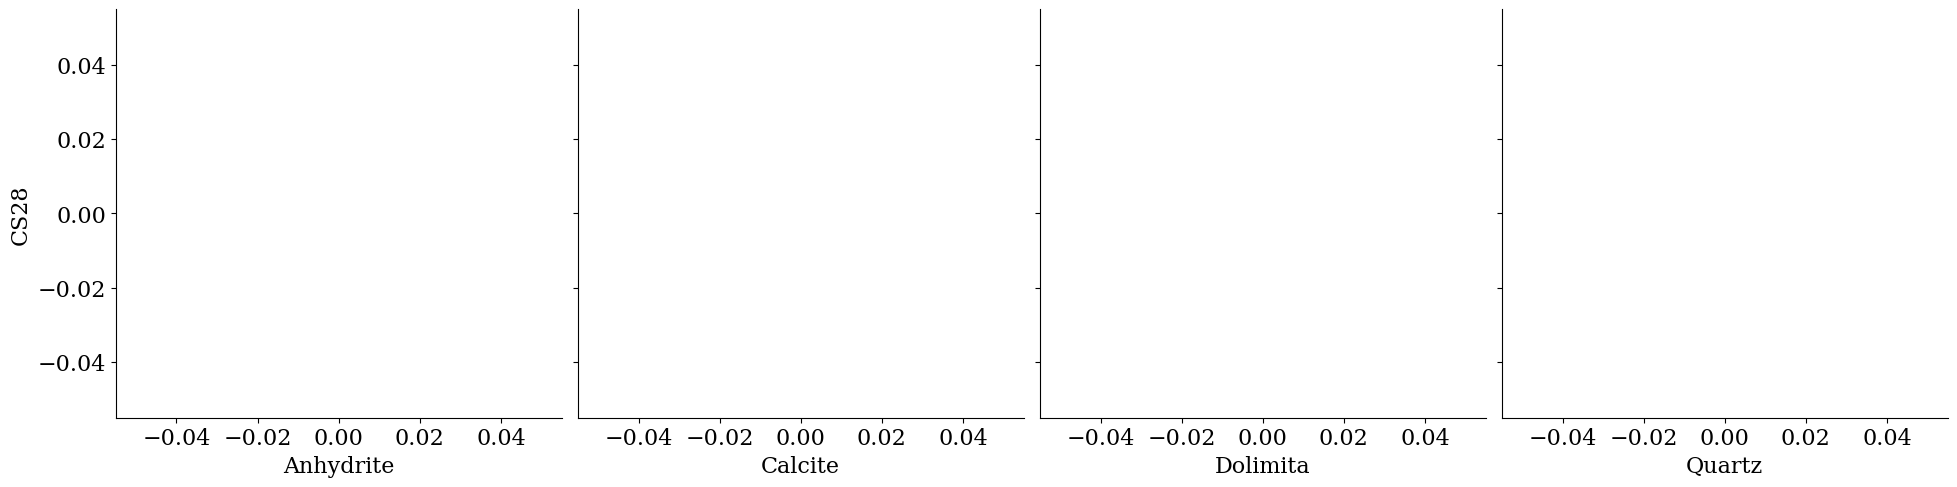

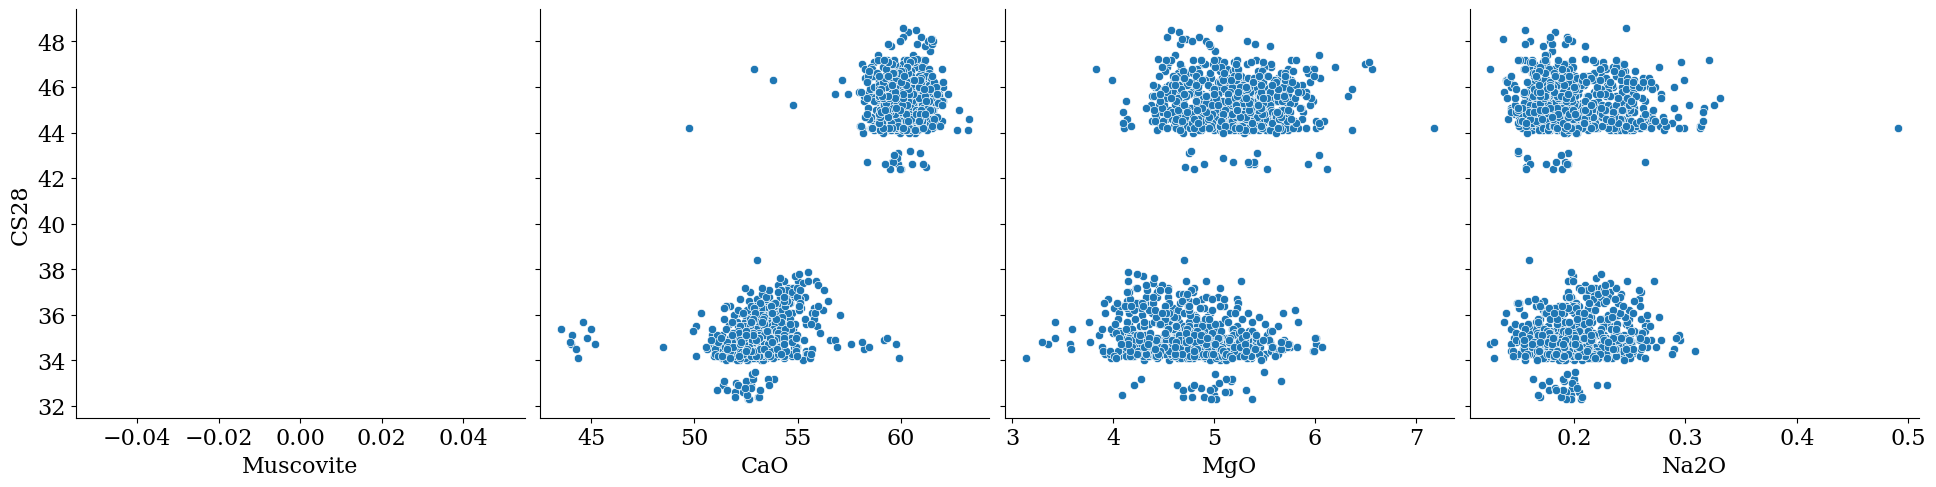

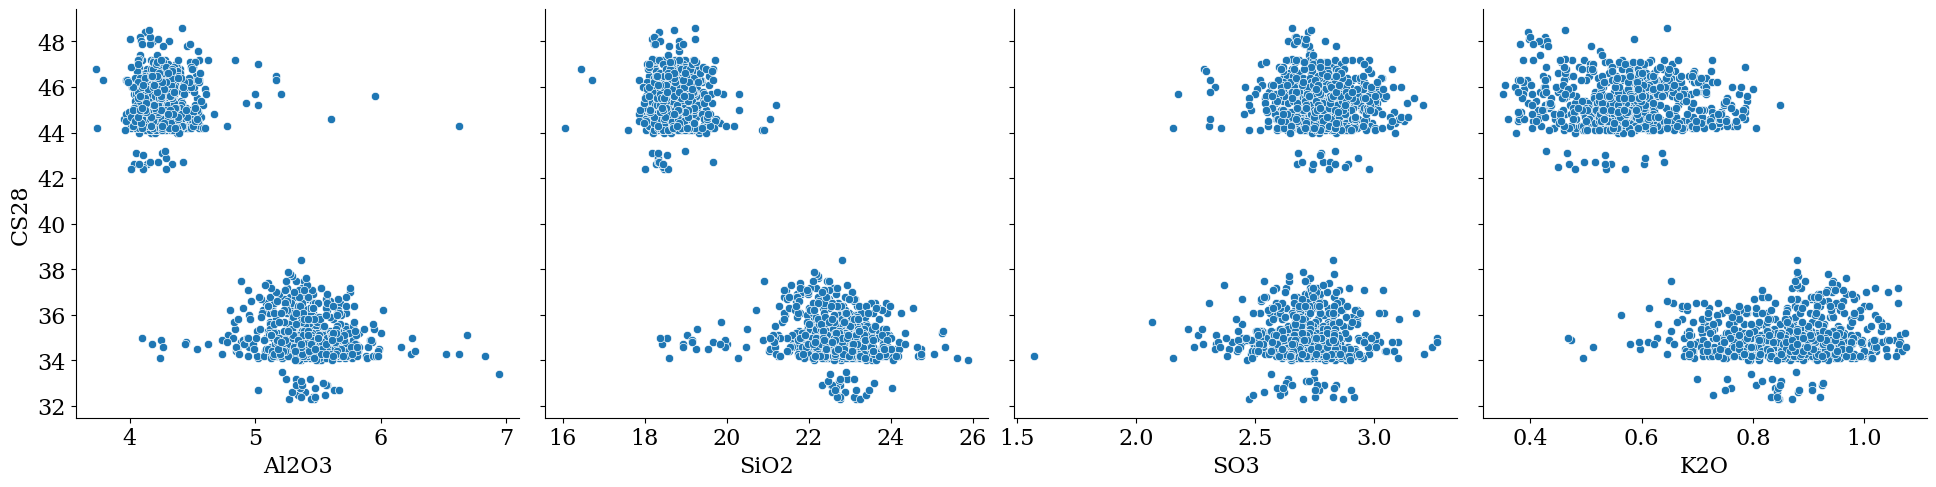

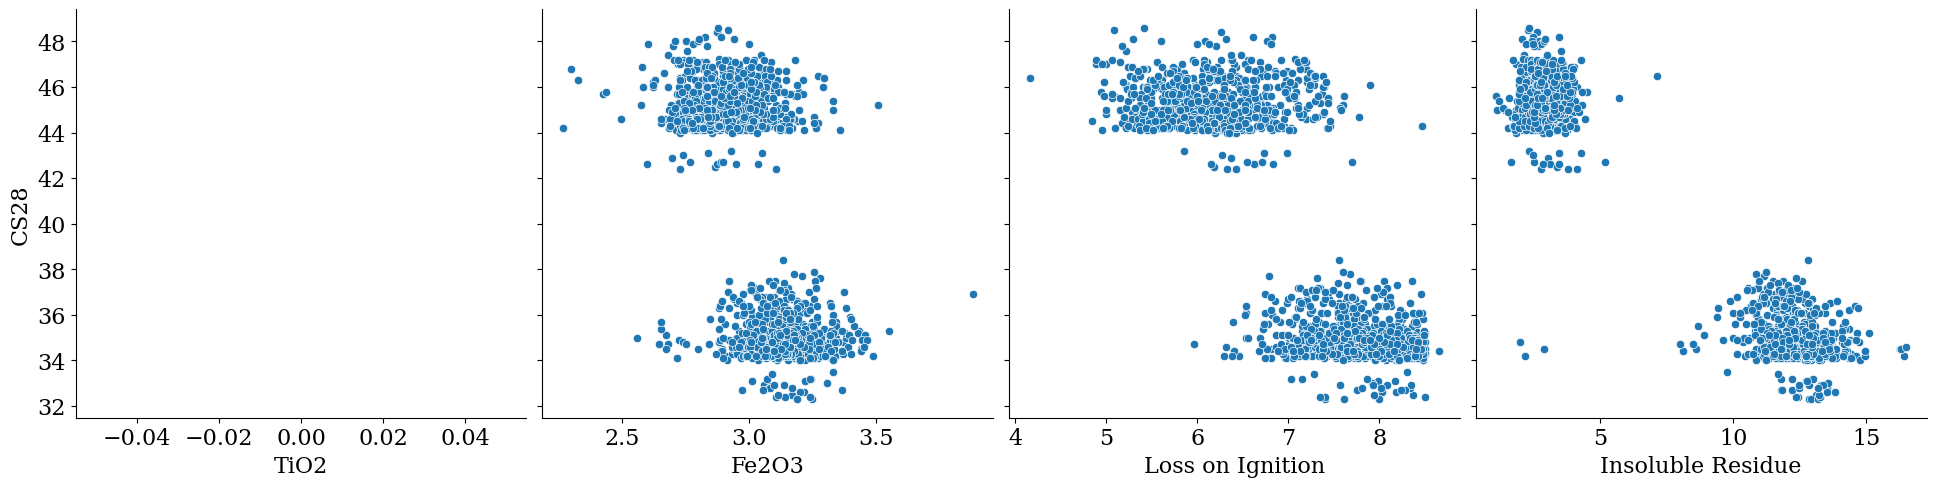

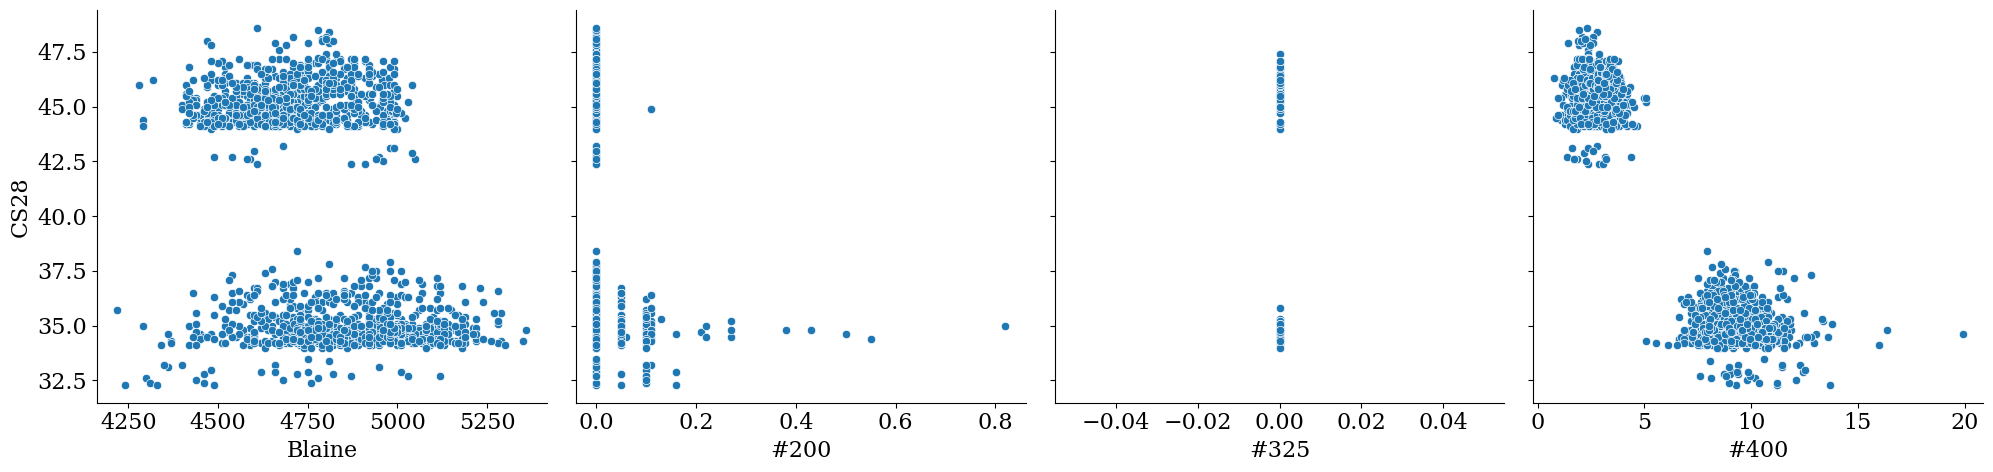

<IPython.core.display.Javascript object>

In [71]:
num_lines = 11
plots_per_line = 4

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [72]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

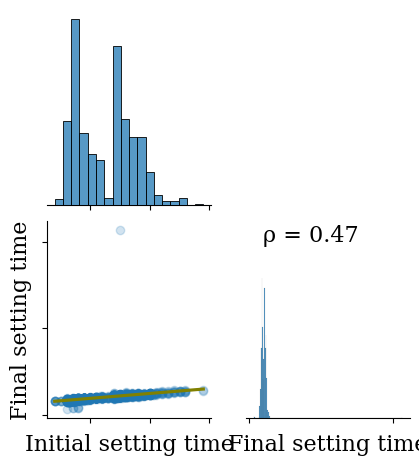

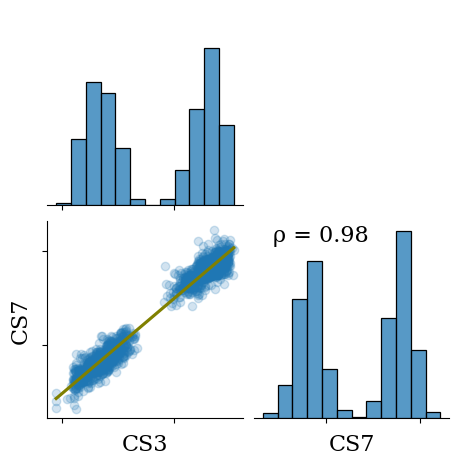

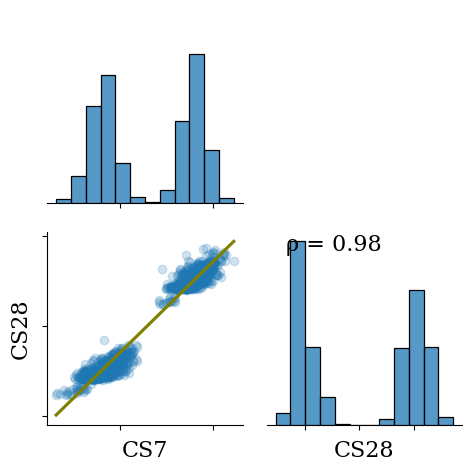

<IPython.core.display.Javascript object>

In [73]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [74]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

652 valid days out of 767


<IPython.core.display.Javascript object>

In [75]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [76]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7, 8}}

<IPython.core.display.Javascript object>

In [77]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        25
      2        24
      3        27
      4        24
      5        25
      6        25
      7        27
      8        26
      9        25
      10       25
      11       24
      12       26
2022  1        25
      2        24
      3        27
      4        24
      5        26
      6        26
      7        26
      8        27
      9        26
      10       25
      11       24
      12       27
2023  1        25
      2        19
      3        23
      4        18
      5        22
      6        21
      7        21
      8         8
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

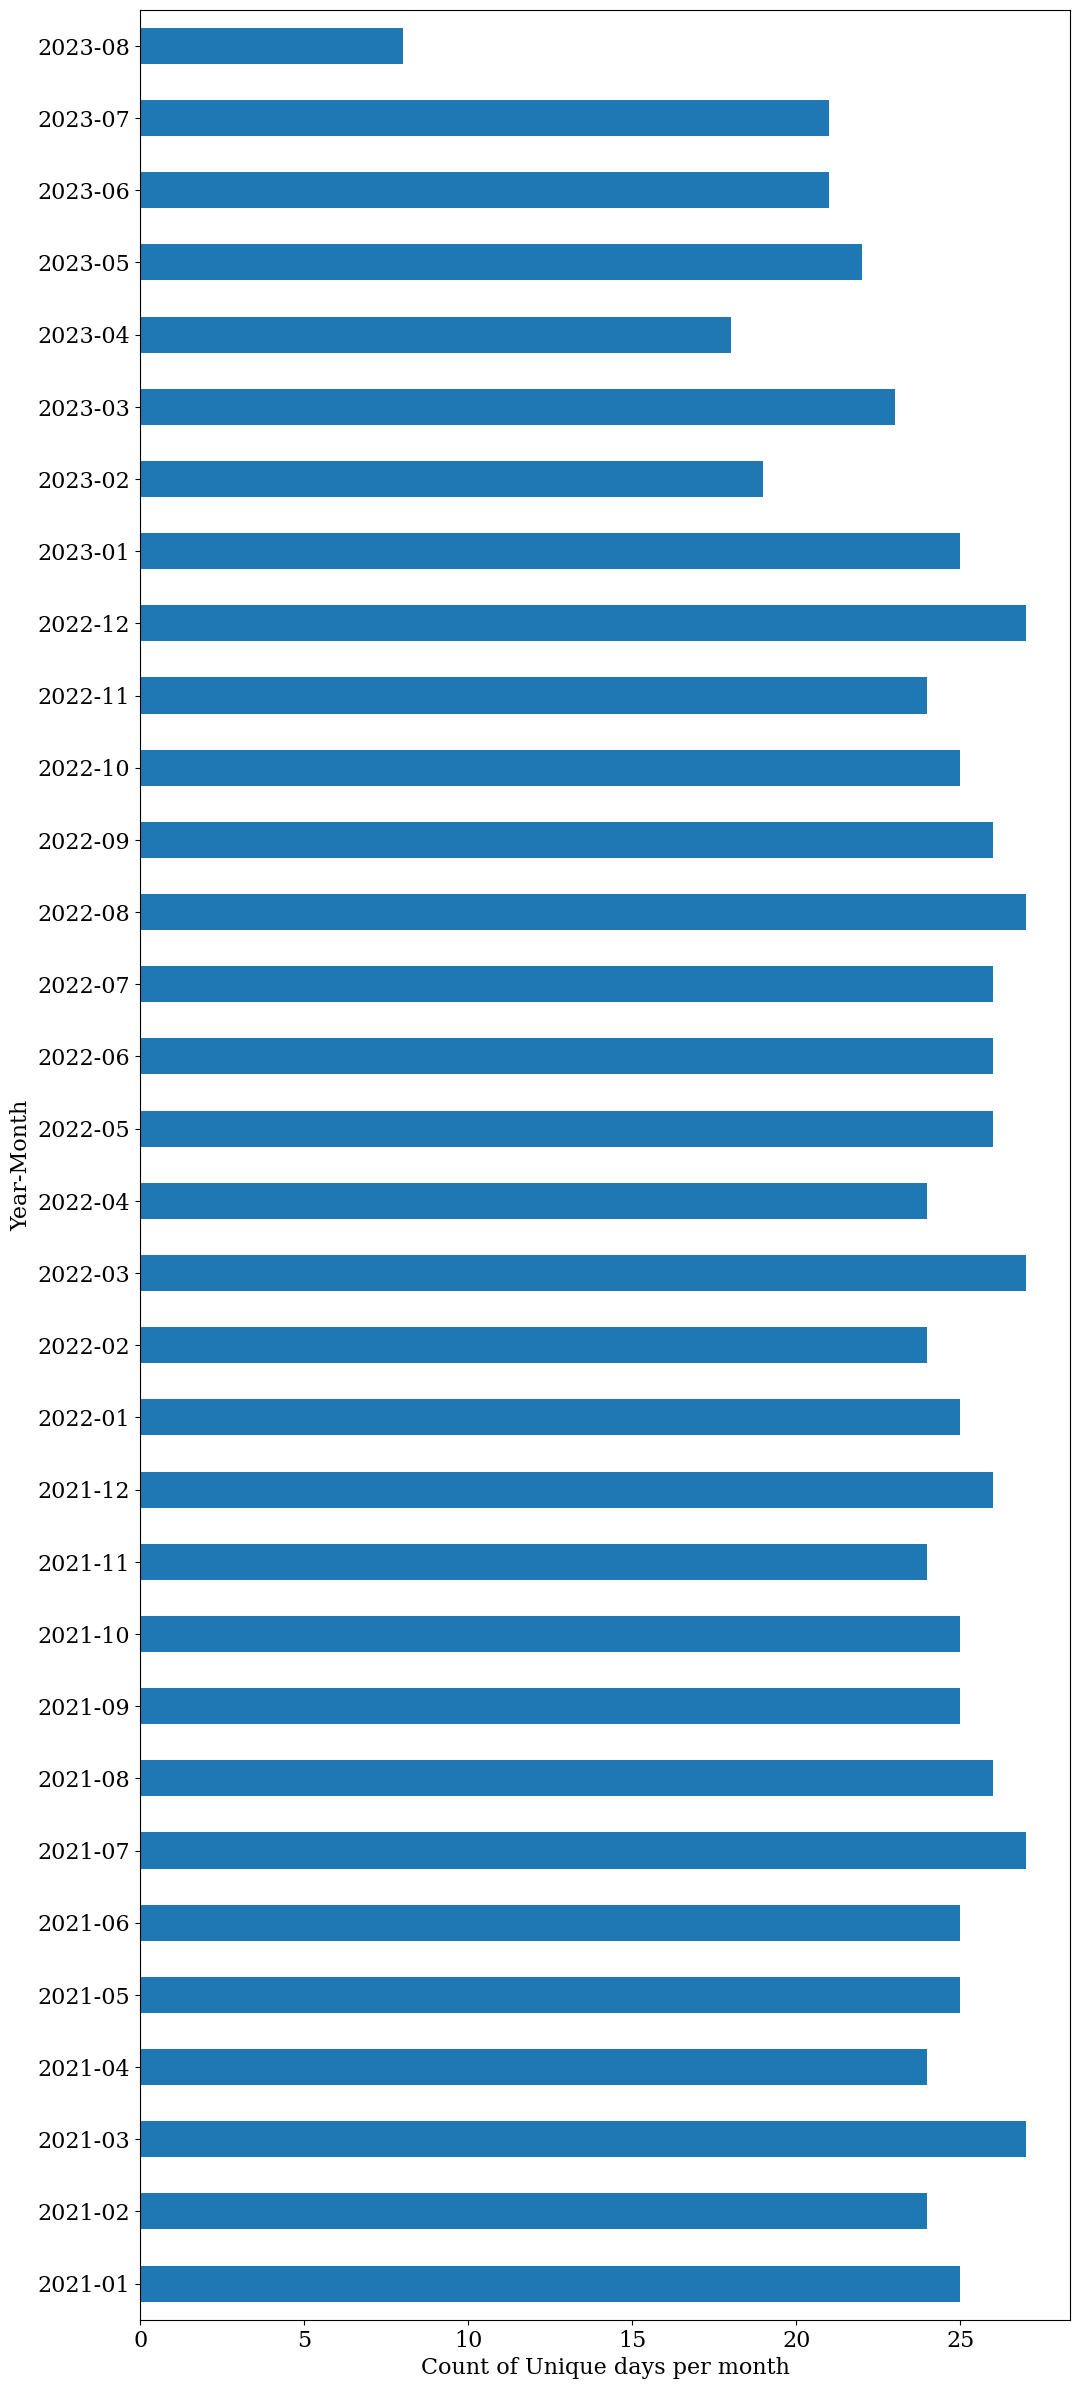

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [79]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        49
      2        48
      3        54
      4        48
      5        50
      6        50
      7        54
      8        52
      9        50
      10       50
      11       48
      12       52
2022  1        50
      2        48
      3        53
      4        48
      5        52
      6        52
      7        52
      8        54
      9        52
      10       50
      11       48
      12       54
2023  1        50
      2        38
      3        46
      4        36
      5        42
      6        40
      7        34
      8         8
Name: size, dtype: int64


<IPython.core.display.Javascript object>

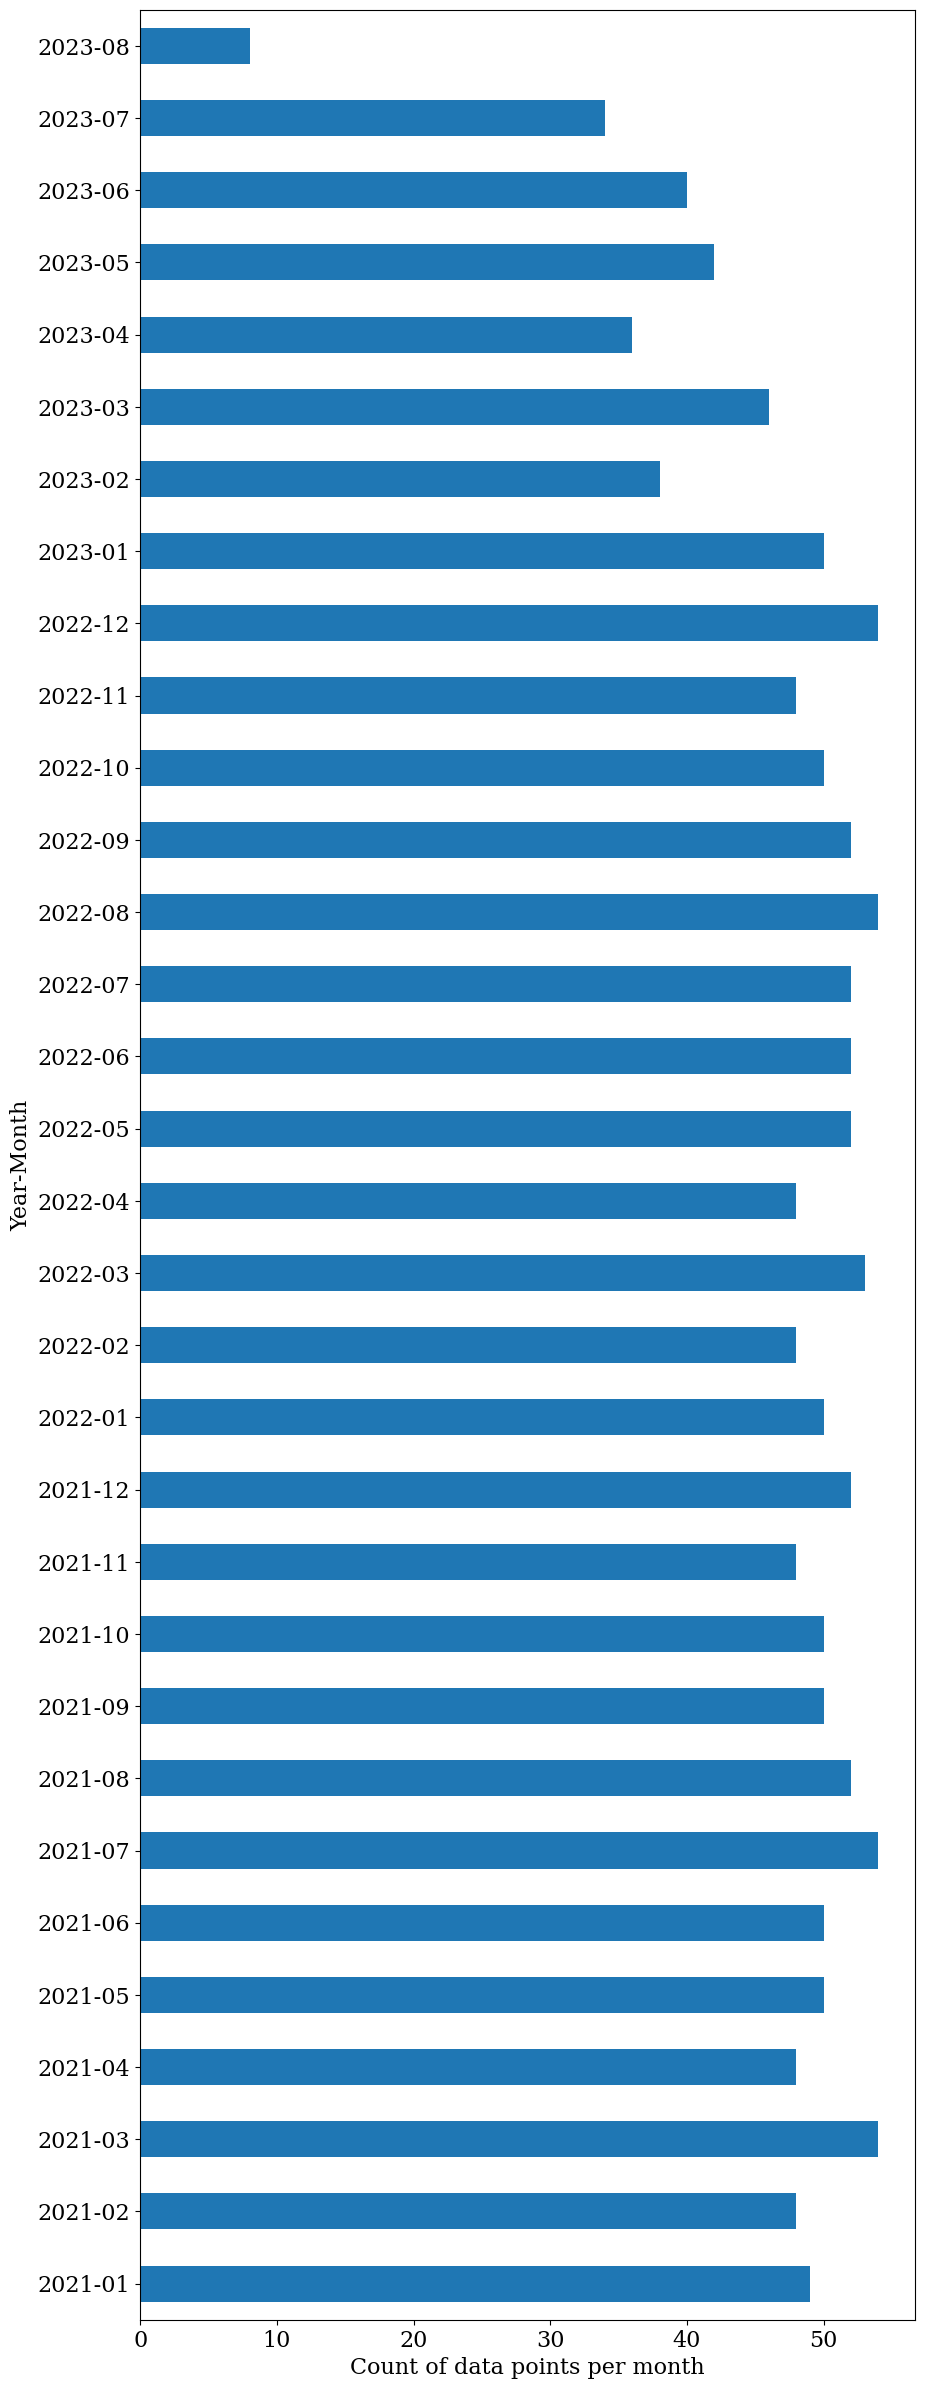

<IPython.core.display.Javascript object>

In [80]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [81]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-8 has the minimum number of days with samples - 8
2021-3 has the maximum number of days with samples - 54


<IPython.core.display.Javascript object>

In [82]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 50, 2022: 51, 2023: 36}

Mean number of observations - all years
47


<IPython.core.display.Javascript object>

In [83]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  767.000000
mean     1.971317
std      0.167023
min      1.000000
25%      2.000000
50%      2.000000
75%      2.000000
max      2.000000

<IPython.core.display.Javascript object>

In [84]:
day_counts[["DayCount"]].value_counts()

DayCount
2           745
1            22
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [85]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
1    2021      1    4         2
2    2021      1    5         2
3    2021      1    6         2
4    2021      1    7         2
5    2021      1    8         2
..    ...    ...  ...       ...
746  2023      7   13         2
747  2023      7   14         2
748  2023      7   15         2
749  2023      7   18         2
750  2023      7   19         2

[745 rows x 4 columns]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

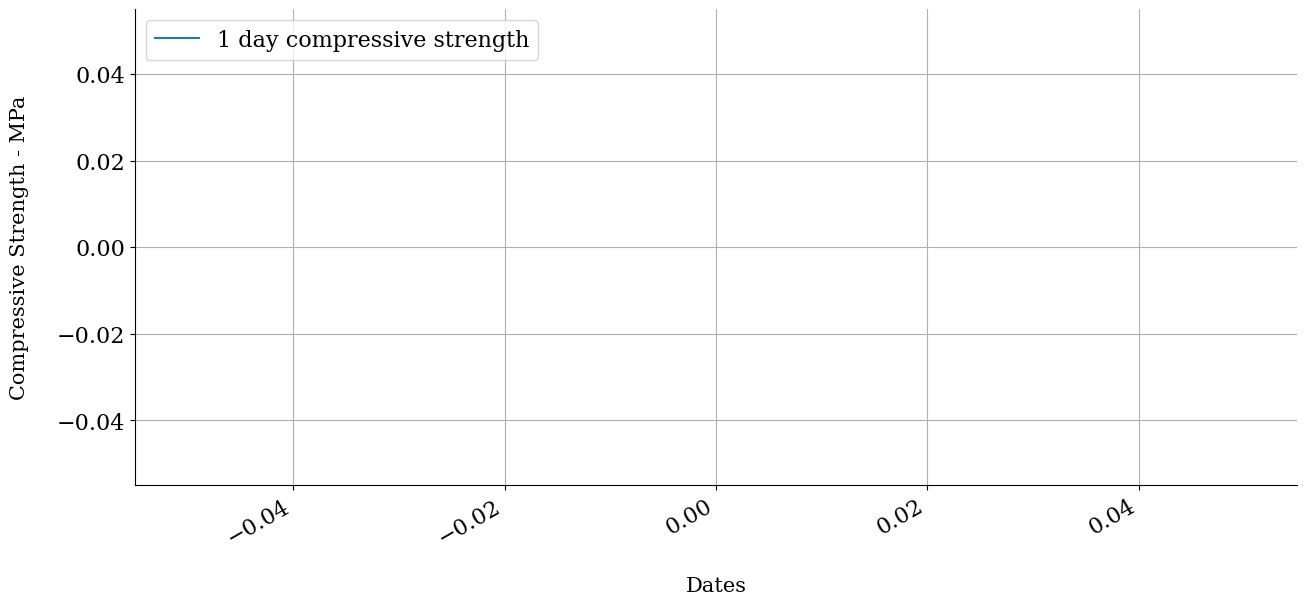

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

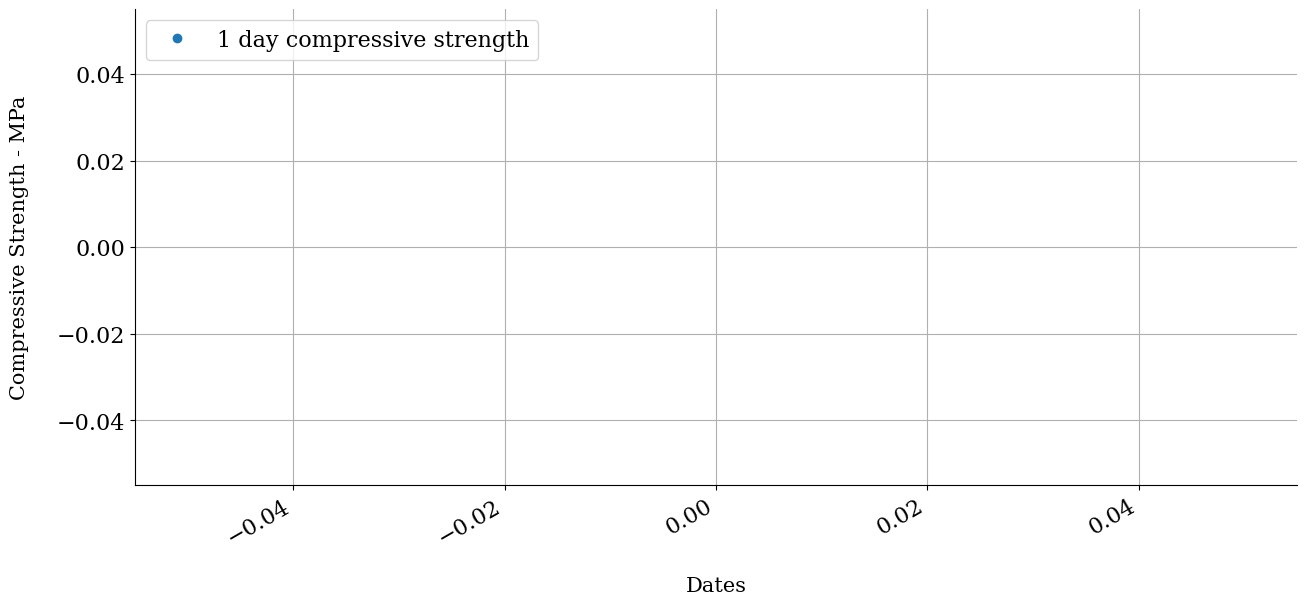

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

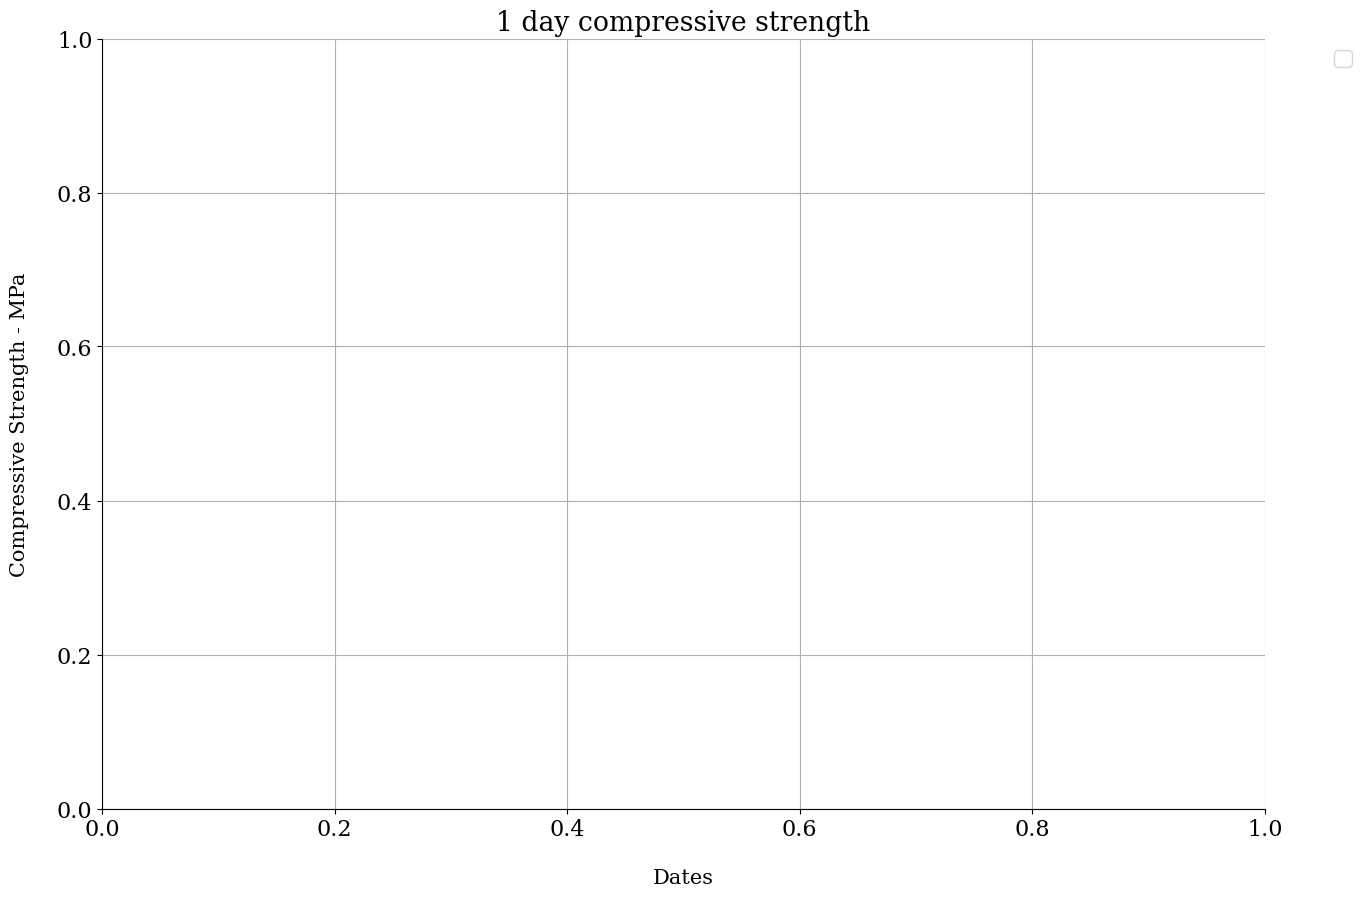

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

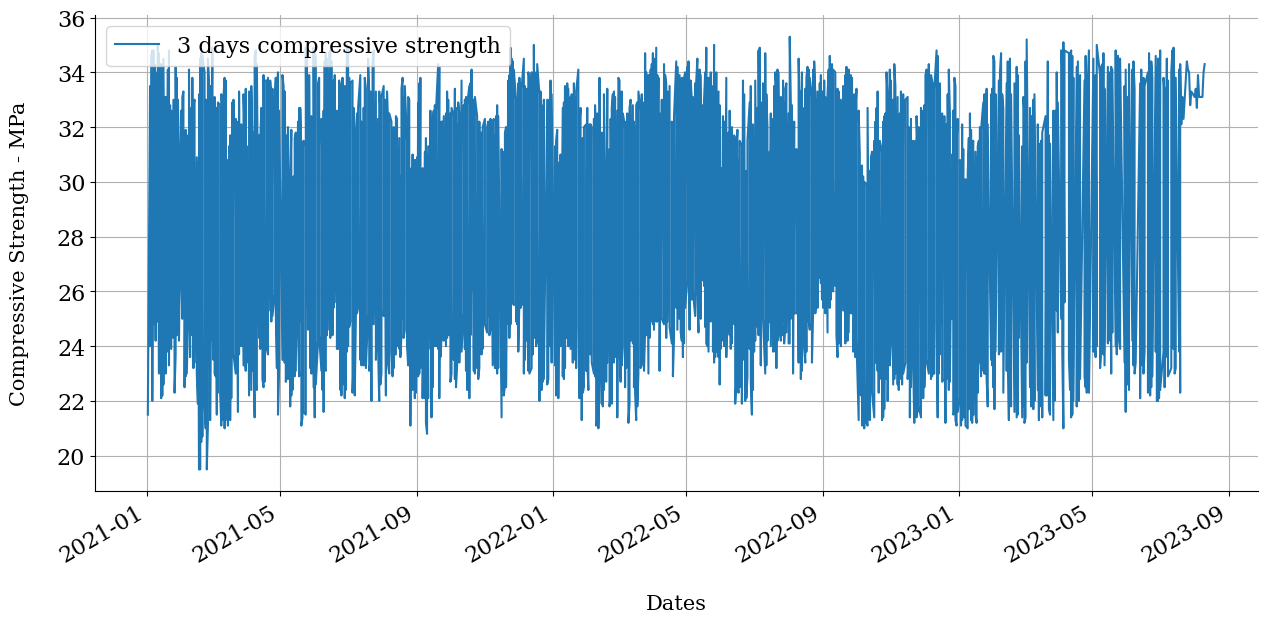

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

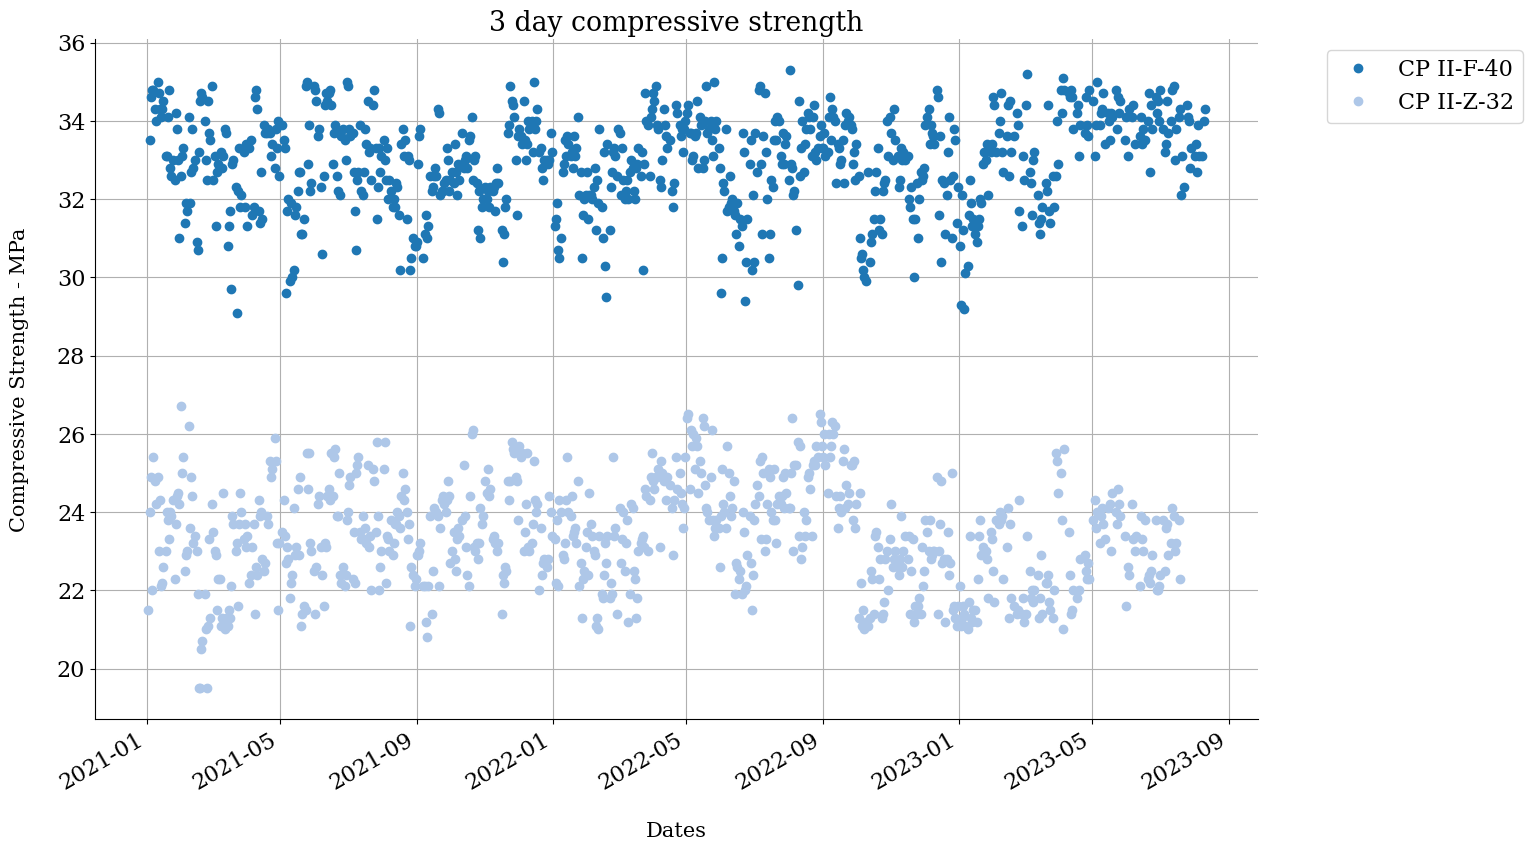

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

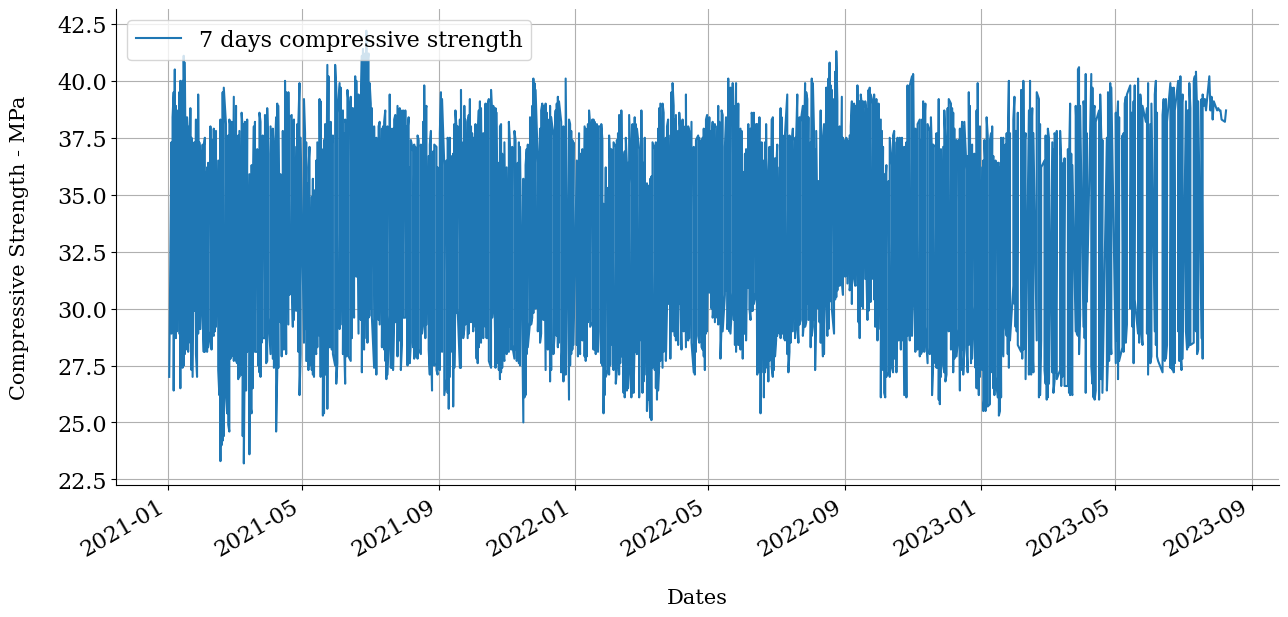

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

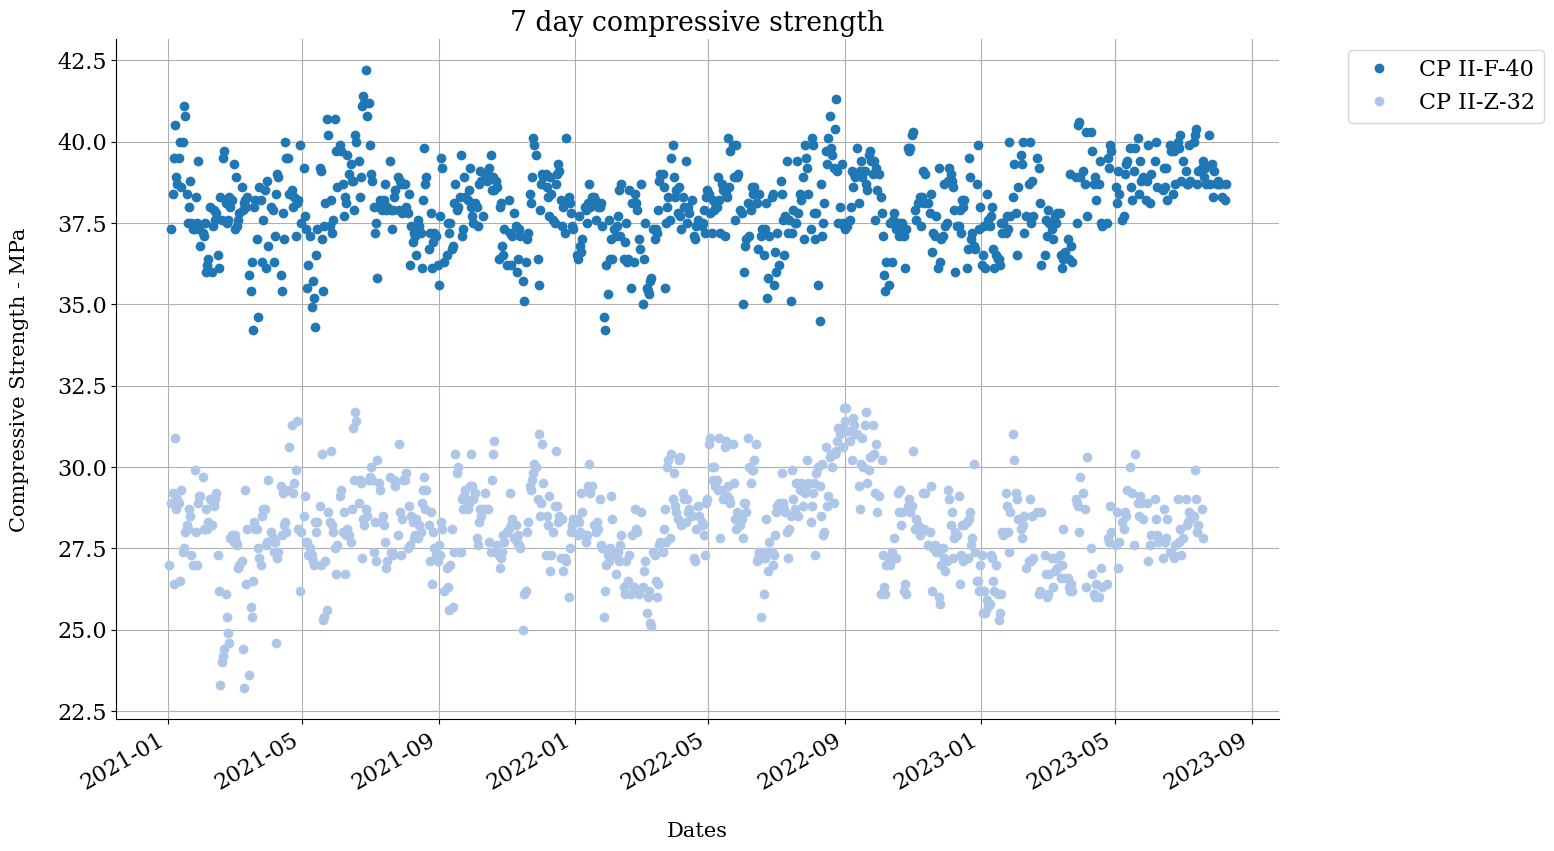

<IPython.core.display.Javascript object>

In [92]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

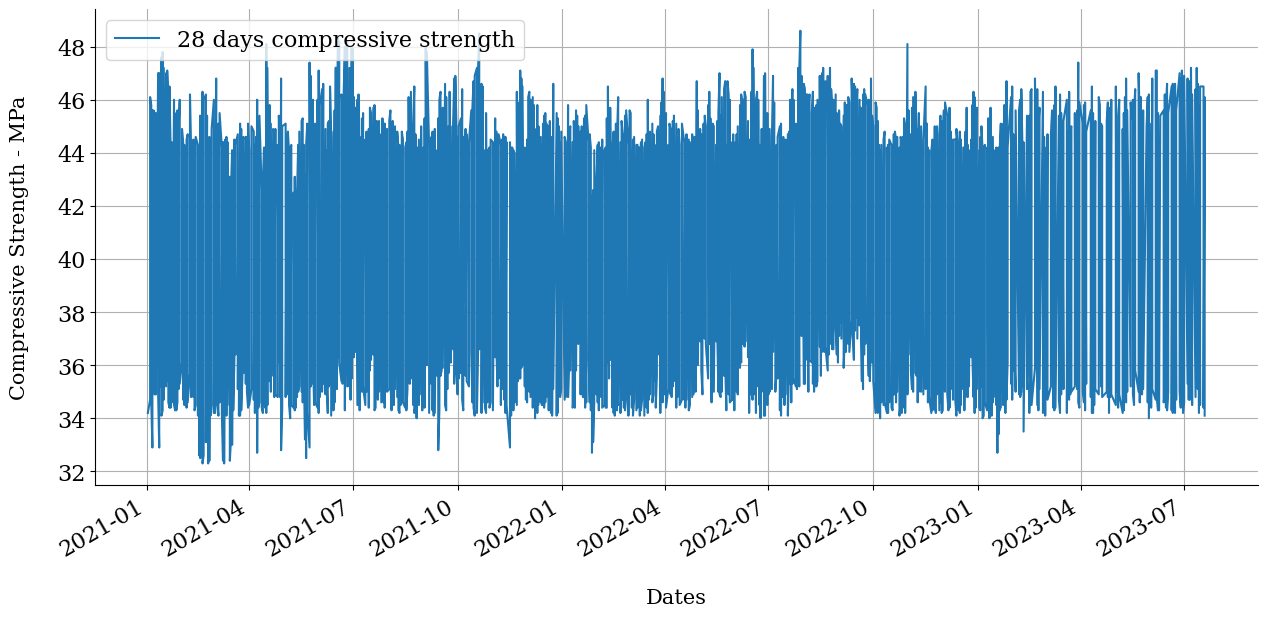

<IPython.core.display.Javascript object>

In [93]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

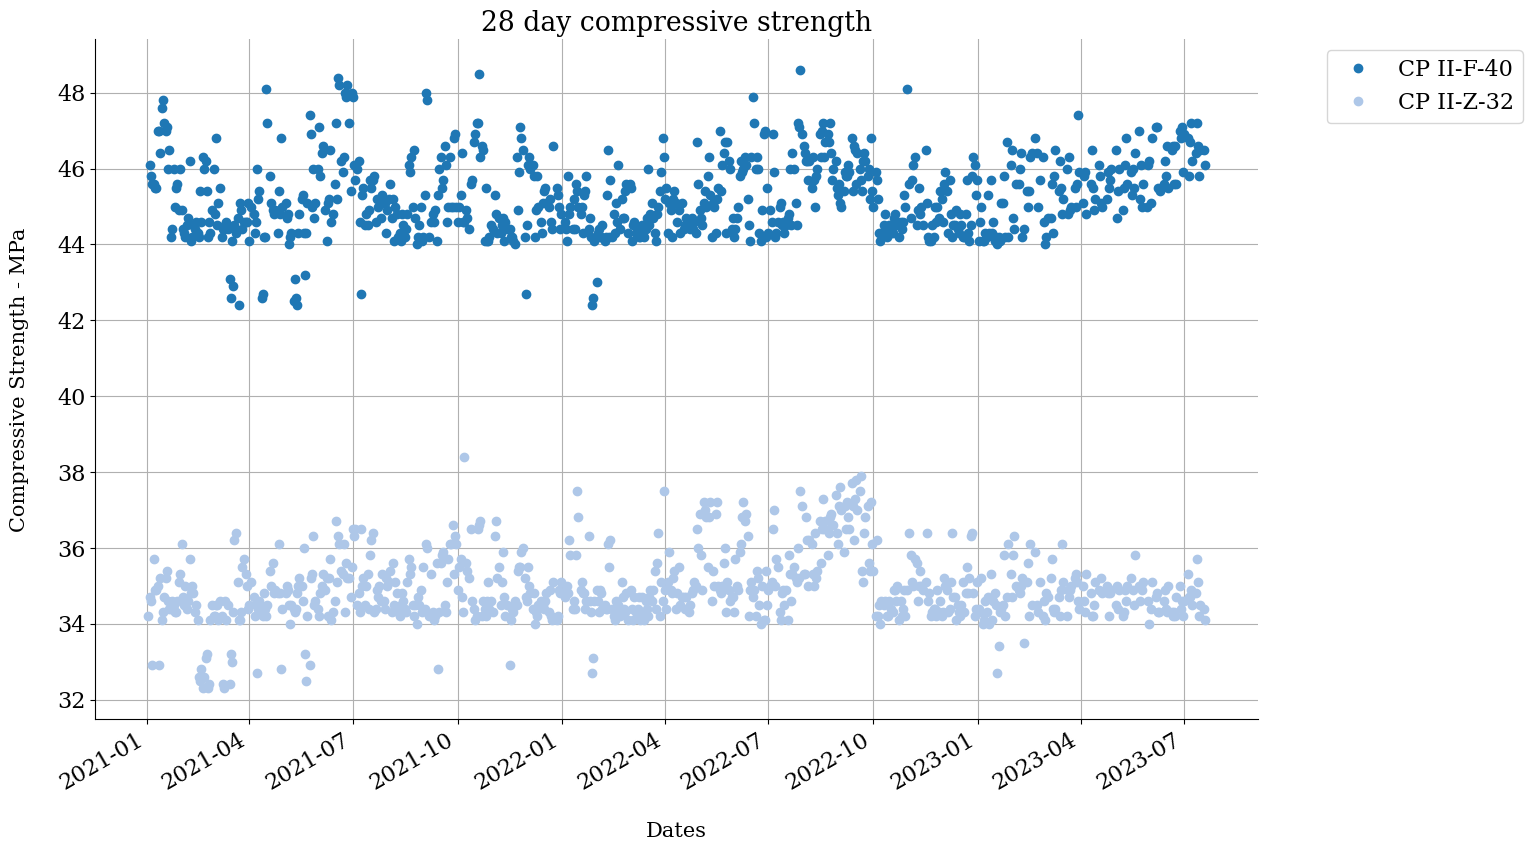

<IPython.core.display.Javascript object>

In [94]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()